# Notebook for preliminary analysis of the data

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import metrics
import numpy as np

## Data loading

In [3]:
# Load csv
probs_df = pd.read_csv('../../models/mappo_20250522_125847/episode_0_action_probs.csv', header=None, sep=";")
actions_df = pd.read_csv('../../models/mappo_20250522_125847/episode_0_actions.csv', header=None, sep=";")
best_log_df = pd.read_csv('../../data/logs/old/log_20250523_080634.csv')
worst_log_df = pd.read_csv('../../data/logs/old/log_20250523_080725.csv')

probs_df.columns = [f"agent_{i}" for i in range(probs_df.shape[1])]
actions_df.columns = [f"agent_{i}" for i in range(actions_df.shape[1])]

# Show head of the dataframes
print("Probabilities (p(a=1)) dataframe:")
print(probs_df.head())
print('Selected actions (a=1: raise hand) dataframe:')
print(actions_df.head())
print('Best log dataframe:')
print(best_log_df.head())
print('Worst log dataframe:')
print(worst_log_df.head())

Probabilities (p(a=1)) dataframe:
    agent_0   agent_1   agent_2   agent_3   agent_4   agent_5   agent_6  \
0  0.507040  0.494558  0.432862  0.526956  0.572653  0.530242  0.508004   
1  0.519103  0.491867  0.448950  0.531445  0.558899  0.521706  0.518344   
2  0.519103  0.625491  0.448950  0.531445  0.558899  0.521706  0.518344   
3  0.537801  0.487164  0.460884  0.537665  0.547525  0.512732  0.524700   
4  0.519103  0.484798  0.448950  0.531445  0.558899  0.521706  0.518344   

    agent_7  
0  0.520188  
1  0.510561  
2  0.510561  
3  0.496935  
4  0.510561  
Selected actions (a=1: raise hand) dataframe:
   agent_0  agent_1  agent_2  agent_3  agent_4  agent_5  agent_6  agent_7
0      0.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0
1      1.0      1.0      1.0      0.0      1.0      0.0      0.0      1.0
2      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0
3      0.0      1.0      0.0      0.0      0.0      1.0      1.0      1.0
4      1.0     

## Data exploration (actions)

In [4]:
# From the actions, group by number of rows where n action == 1 was taken
def count_actions(actions_df, action_value=1):
    counts = {}
    for col in actions_df.columns:
        counts[col] = (actions_df[col] == action_value).sum()
    return counts

# A concurrent action is when multiple agents take the same action at the same time
def count_concurrent_actions(df: pd.DataFrame, action_value: int = 1) -> dict[int, int]:
    # Create a boolean DataFrame: True if action_value was taken, False otherwise
    action_taken_df = (df == action_value)

    # Sum across rows to get the number of agents taking action_value at each timestep
    num_agents_taking_action_per_timestep = action_taken_df.sum(axis=1)

    # Count the occurrences of each sum
    # (e.g., how many timesteps had 0 agents taking action, 1 agent, 2 agents, etc.)
    counts_per_num_agents = num_agents_taking_action_per_timestep.value_counts().sort_index()

    # Initialize the result dictionary with all possible counts of agents (0 to num_columns)
    num_columns = df.shape[1]
    result_dict = {i: 0 for i in range(num_columns + 1)}

    # Populate the dictionary with actual counts
    for num_agents, count_of_timesteps in counts_per_num_agents.items():
        if num_agents in result_dict: # Ensure the sum is a valid key
            result_dict[num_agents] = count_of_timesteps  # type: ignore

    return result_dict


action_counts = count_actions(actions_df)
print("Action counts:")
for agent, count in action_counts.items():
    print(f"{agent} took action '1' {count} times.")

concurrent_action_counts = count_concurrent_actions(actions_df)
print("Concurrent action counts:")
for num_agents, count in concurrent_action_counts.items():
    print(f"{num_agents} agents took action '1' {count} times.")

Action counts:
agent_0 took action '1' 37902 times.
agent_1 took action '1' 30444 times.
agent_2 took action '1' 15616 times.
agent_3 took action '1' 19658 times.
agent_4 took action '1' 50930 times.
agent_5 took action '1' 27656 times.
agent_6 took action '1' 34399 times.
agent_7 took action '1' 27811 times.
Concurrent action counts:
0 agents took action '1' 95 times.
1 agents took action '1' 1607 times.
2 agents took action '1' 7337 times.
3 agents took action '1' 15396 times.
4 agents took action '1' 17883 times.
5 agents took action '1' 12770 times.
6 agents took action '1' 5622 times.
7 agents took action '1' 1591 times.
8 agents took action '1' 212 times.


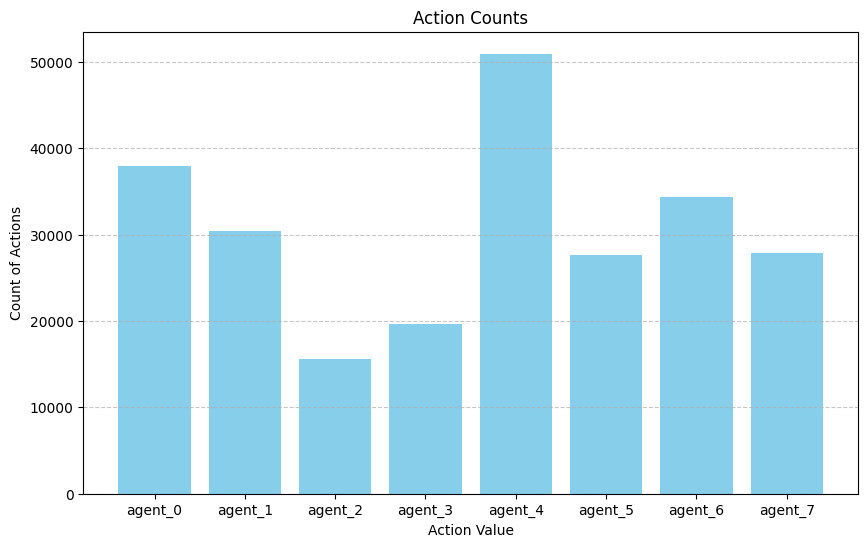

In [5]:
# Histogram of action counts
def plot_action_counts(counts: dict, title: str, xlabel: str, ylabel: str):
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values(), color='skyblue') # type: ignore
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(list(counts.keys()))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plotting action counts
plot_action_counts(action_counts, "Action Counts", "Action Value", "Count of Actions")

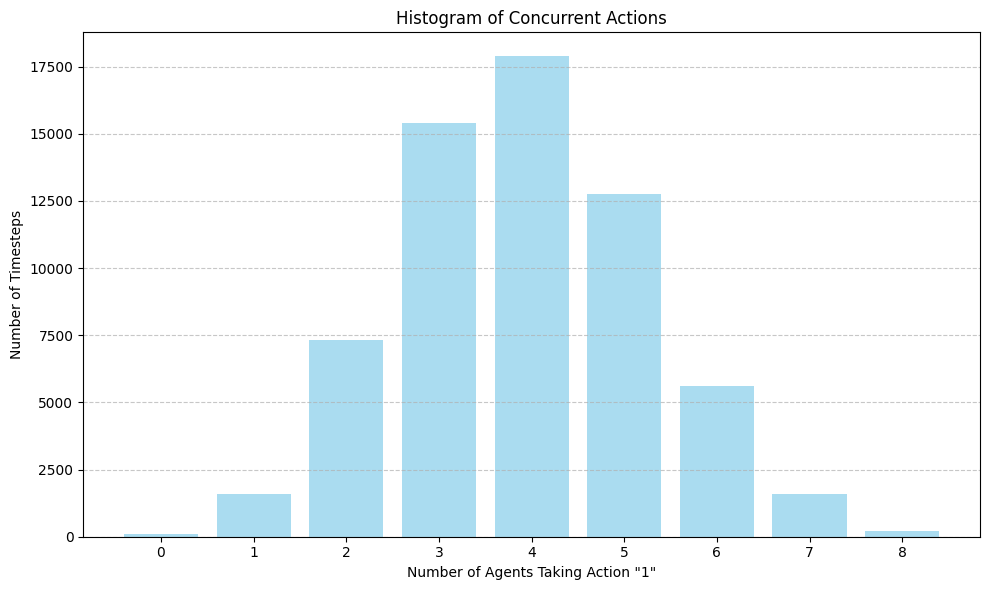

In [6]:
# Histogram of concurrent actions
def plot_concurrent_actions(counts: dict):
    plt.figure(figsize=(10, 6))
    plt.bar(concurrent_action_counts.keys(), concurrent_action_counts.values(), color='skyblue', alpha=0.7) # type: ignore
    plt.xlabel('Number of Agents Taking Action "1"')
    plt.ylabel('Number of Timesteps')
    plt.title('Histogram of Concurrent Actions')
    plt.xticks(list(concurrent_action_counts.keys()))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plotting concurrent action counts
plot_concurrent_actions(concurrent_action_counts)

## Data exploration (case logs)

/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/2321018517.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_throughput_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/2321018517.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby(

Throughput time per agent:
Agent 0: [0.9494728666666667, 142.54798635, 1.0248750666666666, 0.9340337333333333, 0.9035226833333333, 0.8167541333333334, 0.8850497166666667, 1.0742836500000001, 0.9734340833333334, 1.013855, 0.9296188333333333, 0.97323445, 0.9346625, 0.8450756333333334, 1.0475882166666668, 0.006366666666666667, 0.9748436333333333, 1.1235278833333333, 0.7813843666666667, 0.9502575333333334, 0.9989159833333333, 326.3659684166667, 0.9660611833333334, 0.006366666666666667, 1.15295975, 2.6929099166666663, 1.1726701000000002, 0.9905400833333334, 289.1377721, 0.96713505, 1.0709055666666667, 0.8380958833333333, 123.84806253333333, 0.9826479, 0.8392934000000001, 0.8459225333333333, 0.7611015333333333, 0.98545305, 1.0472700666666668, 0.9105321833333334, 0.8696762166666667, 1.0027495333333334, 0.006366666666666667, 1.0290482166666668, 1.1026991833333333, 0.9588769, 1.2402531166666668, 0.006366666666666667, 1.1852447499999998, 64.41240268333334, 0.9128918833333334, 1.0101649166666666,

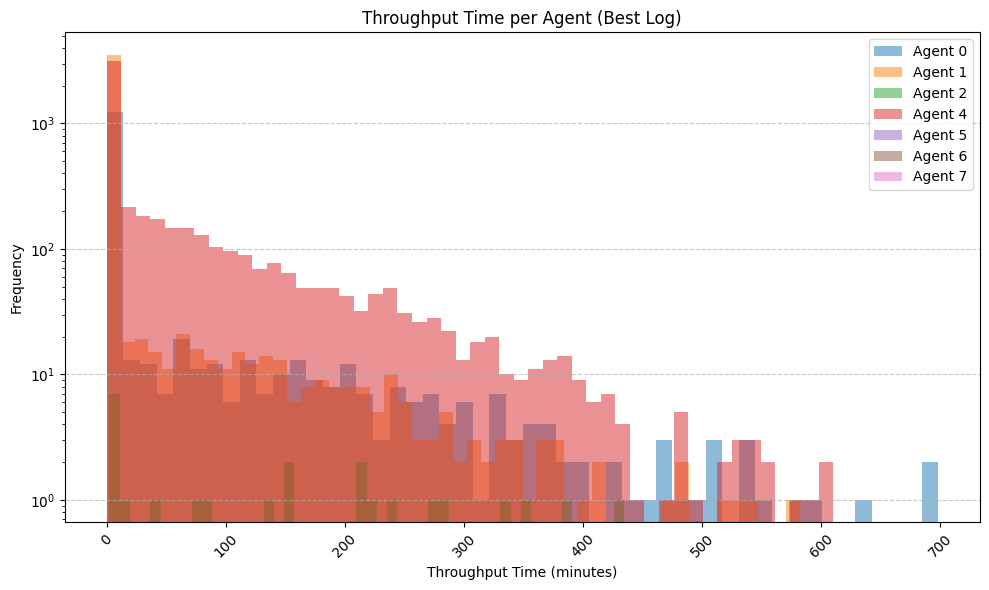

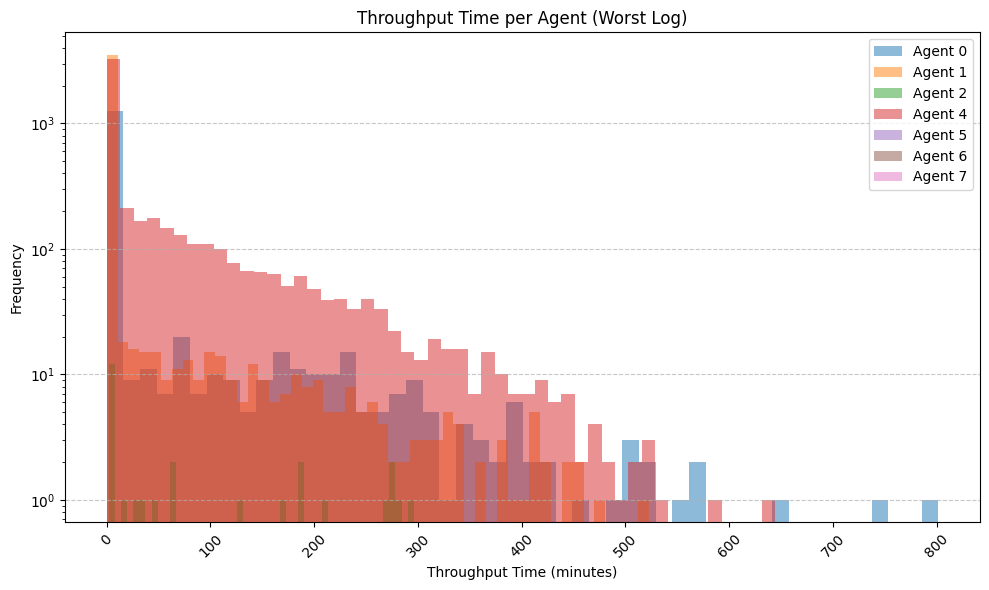

In [7]:
# Calculate throughput time per agent
def calculate_throughput_per_agent(df: pd.DataFrame) -> dict:
    # Ensure 'task_agent_id', 'task_completed_time', 'task_assigned_time' exist
    if not all(col in df.columns for col in ['task_agent_id', 'task_completed_time', 'task_assigned_time']):
        # You might want to raise an error or handle this case appropriately
        print("Error: DataFrame must contain 'task_agent_id', 'task_completed_time', and 'task_assigned_time' columns.")
        return {}

    # Make a copy to safely add new columns or modify, and avoid SettingWithCopyWarning
    df_copy = df.copy()

    # Convert time columns to datetime objects once
    df_copy['task_completed_time_dt'] = pd.to_datetime(df_copy['task_completed_time'], format="mixed")
    df_copy['task_assigned_time_dt'] = pd.to_datetime(df_copy['task_assigned_time'], format="mixed")

    # Define a function to process each group
    def calculate_throughput_for_each_task_in_group(group):
        if group.empty:
            return []

        # Calculate throughput for each task in the group
        throughputs = []
        for index, row in group.iterrows():
            completed_time = row['task_completed_time_dt']
            assigned_time = row['task_assigned_time_dt']
            # This assumes metrics.throughput_time can handle pd.Timestamp inputs
            # and potentially NaT if present.
            throughput_value = metrics.throughput_time(completed_time, assigned_time)
            throughputs.append(throughput_value)
        return throughputs

    # Group by 'task_agent_id' and apply the function to each group
    throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_throughput_for_each_task_in_group)

    # Convert the resulting Series to a dictionary
    return throughput_lists_series.to_dict()

# Calculate throughput time per agent for the best log
throughput_time_per_agent = calculate_throughput_per_agent(best_log_df)
print("Throughput time per agent:")
for agent_id, times in throughput_time_per_agent.items():
    print(f"Agent {agent_id}: {times}")

# Calculate throughput time per agent for the worst log
throughput_time_per_agent_worst = calculate_throughput_per_agent(worst_log_df)
print("Throughput time per agent (worst log):")
for agent_id, times in throughput_time_per_agent_worst.items():
    print(f"Agent {agent_id}: {times}")
# Plotting throughput time per agent
def plot_throughput_time(throughput_time_per_agent: dict, title: str):
    plt.figure(figsize=(10, 6))
    # Subplots for each agent
    for agent_id, times in throughput_time_per_agent.items():
        plt.hist(times, bins=50, alpha=0.5, label=f"Agent {agent_id}")
    plt.title(title)
    plt.xlabel('Throughput Time (minutes)')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Plotting throughput time for the best log
plot_throughput_time(throughput_time_per_agent, "Throughput Time per Agent (Best Log)")
# Plotting throughput time for the worst log
plot_throughput_time(throughput_time_per_agent_worst, "Throughput Time per Agent (Worst Log)")

/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/4111664505.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_waiting_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/4111664505.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('ta

Throughput time per agent:
Agent 0: [0.0, 140.02824586666665, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 42.01900726666667, 0.0, 0.0, 0.0, 1.7920166666666666, 0.0, 0.0, 289.1314054333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 63.29983656666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 222.76718403333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 594.0515470333333, 0.0, 0.0, 1.7879996166666667, 1.7983833333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 165.6104373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 201.5209323, 0.0, 2.19381665, 0.0, 0.0, 55.935834533333335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.643656233333333, 0.0, 63.68087993333334, 0.0, 0.0, 0.0, 0.0, 2.88795575, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.419687916666668, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 128.85763165, 0.0, 0.0, 0.0, 0.0, 0

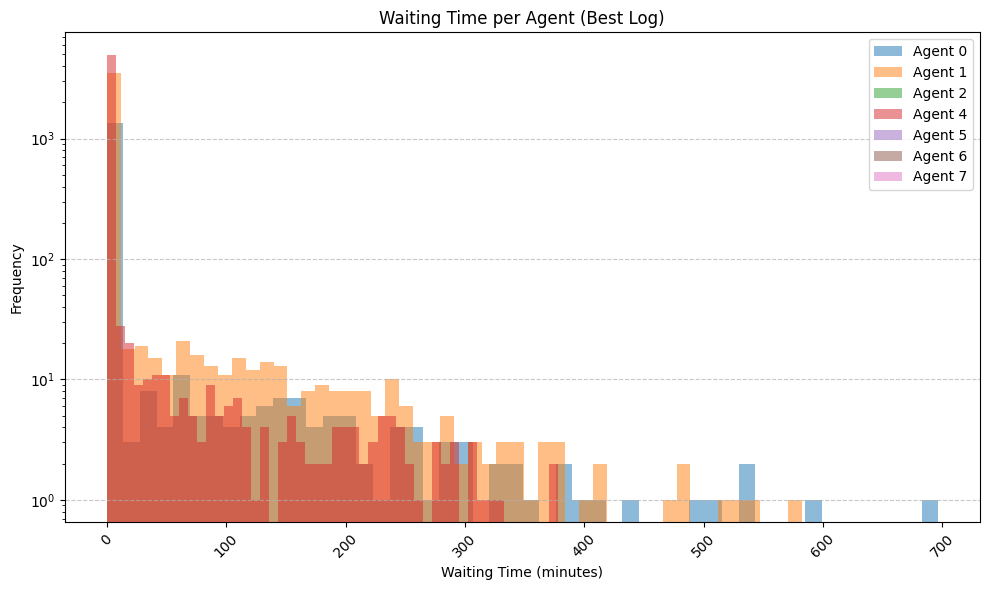

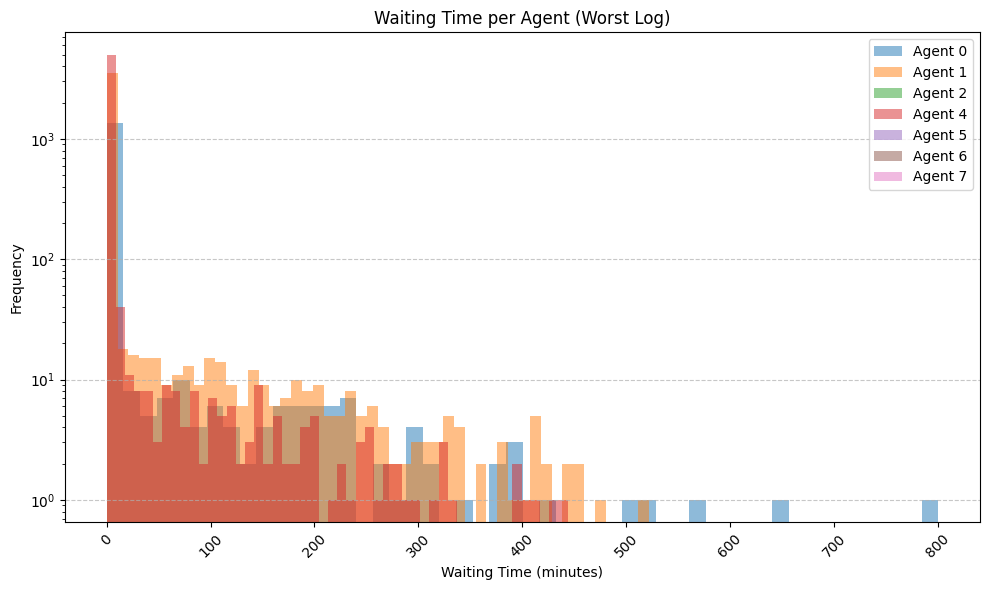

In [8]:
# Calculate throughput time per agent
def calculate_waiting_time_per_agent(df: pd.DataFrame) -> dict:
    # Ensure 'task_agent_id', 'task_completed_time', 'task_assigned_time' exist
    if not all(col in df.columns for col in ['task_agent_id', 'task_started_time', 'task_assigned_time']):
        # You might want to raise an error or handle this case appropriately
        print("Error: DataFrame must contain 'task_agent_id', 'task_started_time', and 'task_assigned_time' columns.")
        return {}

    # Make a copy to safely add new columns or modify, and avoid SettingWithCopyWarning
    df_copy = df.copy()

    # Convert time columns to datetime objects once
    df_copy['task_started_time_dt'] = pd.to_datetime(df_copy['task_started_time'], format="mixed")
    df_copy['task_assigned_time_dt'] = pd.to_datetime(df_copy['task_assigned_time'], format="mixed")

    # Define a function to process each group
    def calculate_waiting_for_each_task_in_group(group):
        if group.empty:
            return []

        # Calculate throughput for each task in the group
        throughputs = []
        for index, row in group.iterrows():
            start_time = row['task_started_time_dt']
            assigned_time = row['task_assigned_time_dt']
            # This assumes metrics.throughput_time can handle pd.Timestamp inputs
            # and potentially NaT if present.
            throughput_value = metrics.waiting_time(start_time, assigned_time)
            throughputs.append(throughput_value)
        return throughputs

    # Group by 'task_agent_id' and apply the function to each group
    throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_waiting_for_each_task_in_group)

    # Convert the resulting Series to a dictionary
    return throughput_lists_series.to_dict()

# Calculate throughput time per agent for the best log
waiting_time_per_agent = calculate_waiting_time_per_agent(best_log_df)
print("Throughput time per agent:")
for agent_id, times in waiting_time_per_agent.items():
    print(f"Agent {agent_id}: {times}")

# Calculate throughput time per agent for the worst log
waiting_time_per_agent_worst = calculate_waiting_time_per_agent(worst_log_df)
print("Throughput time per agent (worst log):")
for agent_id, times in waiting_time_per_agent_worst.items():
    print(f"Agent {agent_id}: {times}")
# Plotting throughput time per agent
def plot_waiting_time(waiting_time_per_agent: dict, title: str):
    plt.figure(figsize=(10, 6))
    # Subplots for each agent
    for agent_id, times in waiting_time_per_agent.items():
        plt.hist(times, bins=50, alpha=0.5, label=f"Agent {agent_id}")
    plt.title(title)
    plt.xlabel('Waiting Time (minutes)')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Plotting throughput time for the best log
plot_waiting_time(waiting_time_per_agent, "Waiting Time per Agent (Best Log)")
# Plotting throughput time for the worst log
plot_waiting_time(waiting_time_per_agent_worst, "Waiting Time per Agent (Worst Log)")

/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/857405815.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_processing_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/857405815.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('t

Processing time per agent:
Agent 0: [0.9494728666666667, 2.5197404666666667, 1.0248750666666666, 0.9340337333333333, 0.9035226833333333, 0.8167541333333334, 0.8850497166666667, 1.0742836500000001, 0.9734340833333334, 1.013855, 0.9296188333333333, 0.97323445, 0.9346625, 0.8450756333333334, 1.0475882166666668, 0.006366666666666667, 0.9748436333333333, 1.1235278833333333, 0.7813843666666667, 0.9502575333333334, 0.9989159833333333, 284.34696115, 0.9660611833333334, 0.006366666666666667, 1.15295975, 0.90089325, 1.1726701000000002, 0.9905400833333334, 0.006366666666666667, 0.96713505, 1.0709055666666667, 0.8380958833333333, 123.84806253333333, 0.9826479, 0.8392934000000001, 0.8459225333333333, 0.7611015333333333, 0.98545305, 1.0472700666666668, 0.9105321833333334, 0.8696762166666667, 1.0027495333333334, 0.006366666666666667, 1.0290482166666668, 1.1026991833333333, 0.9588769, 1.2402531166666668, 0.006366666666666667, 1.1852447499999998, 1.1125661166666667, 0.9128918833333334, 1.01016491666666

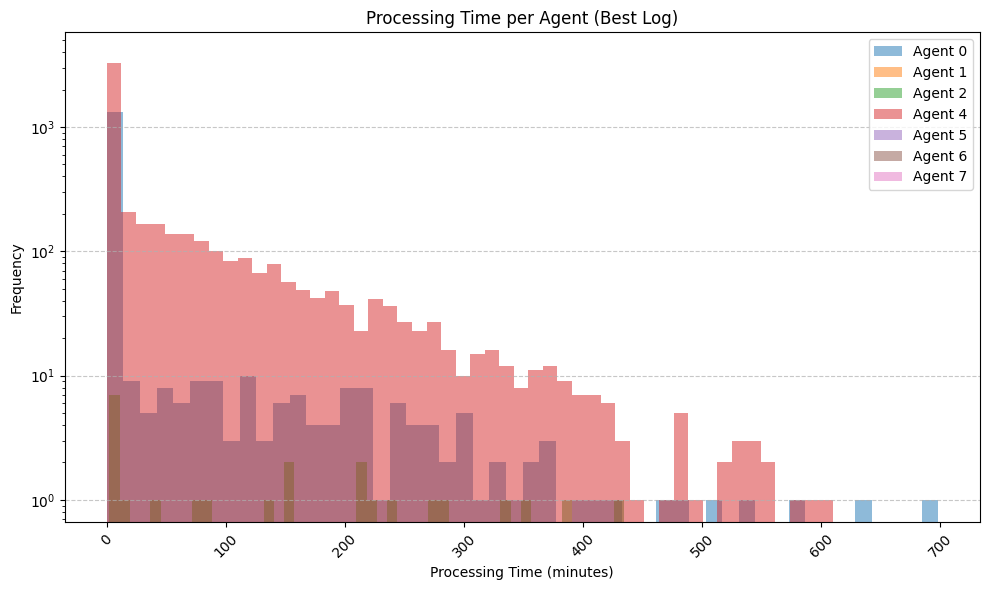

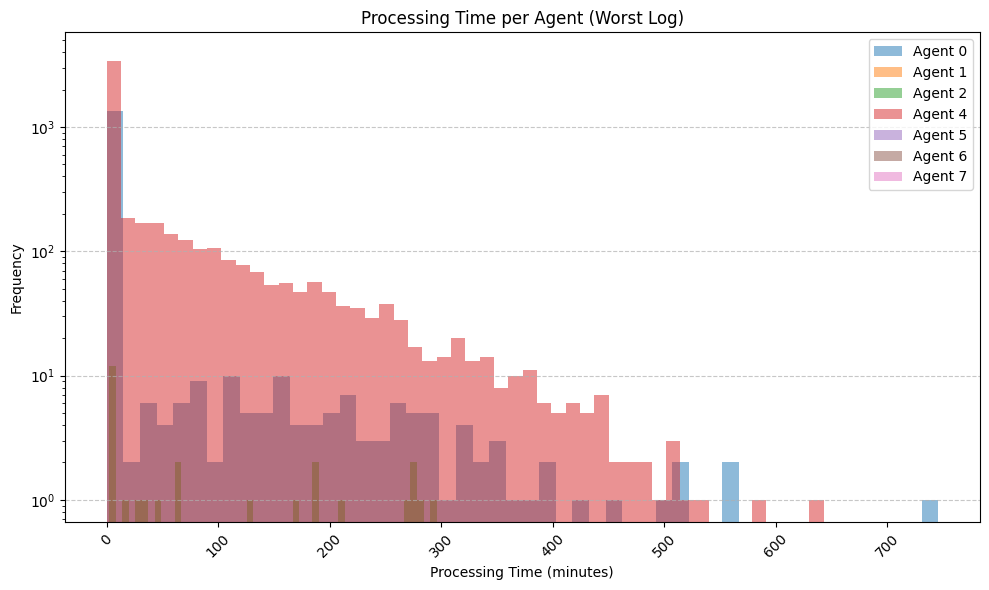

In [9]:
def calculate_processing_time_per_agent(df: pd.DataFrame) -> dict:
    # Ensure 'task_agent_id', 'task_completed_time', 'task_started_time' exist
    if not all(col in df.columns for col in ['task_agent_id', 'task_completed_time', 'task_started_time']):
        # You might want to raise an error or handle this case appropriately
        print("Error: DataFrame must contain 'task_agent_id', 'task_completed_time', and 'task_started_time' columns.")
        return {}

    # Make a copy to safely add new columns or modify, and avoid SettingWithCopyWarning
    df_copy = df.copy()

    # Convert time columns to datetime objects once
    df_copy['task_completed_time_dt'] = pd.to_datetime(df_copy['task_completed_time'], format="mixed")
    df_copy['task_started_time_dt'] = pd.to_datetime(df_copy['task_started_time'], format="mixed")

    # Define a function to process each group
    def calculate_processing_for_each_task_in_group(group):
        if group.empty:
            return []

        # Calculate throughput for each task in the group
        throughputs = []
        for index, row in group.iterrows():
            completed_time = row['task_completed_time_dt']
            started_time = row['task_started_time_dt']
            # This assumes metrics.throughput_time can handle pd.Timestamp inputs
            # and potentially NaT if present.
            throughput_value = metrics.processing_time(started_time, completed_time)
            throughputs.append(throughput_value)
        return throughputs

    # Group by 'task_agent_id' and apply the function to each group
    throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_processing_for_each_task_in_group)

    # Convert the resulting Series to a dictionary
    return throughput_lists_series.to_dict()

# Calculate processing time per agent for the best log
processing_time_per_agent = calculate_processing_time_per_agent(best_log_df)
print("Processing time per agent:")
for agent_id, times in processing_time_per_agent.items():
    print(f"Agent {agent_id}: {times}")
# Calculate processing time per agent for the worst log
processing_time_per_agent_worst = calculate_processing_time_per_agent(worst_log_df)
print("Processing time per agent (worst log):")
for agent_id, times in processing_time_per_agent_worst.items():
    print(f"Agent {agent_id}: {times}")
# Plotting processing time per agent
def plot_processing_time(processing_time_per_agent: dict, title: str):
    plt.figure(figsize=(10, 6))
    # Subplots for each agent
    for agent_id, times in processing_time_per_agent.items():
        plt.hist(times, bins=50, alpha=0.5, label=f"Agent {agent_id}")
    plt.title(title)
    plt.xlabel('Processing Time (minutes)')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Plotting processing time for the best log
plot_processing_time(processing_time_per_agent, "Processing Time per Agent (Best Log)")
# Plotting processing time for the worst log
plot_processing_time(processing_time_per_agent_worst, "Processing Time per Agent (Worst Log)")

In [10]:
def plot_action_probabilities(probs_df: pd.DataFrame, log_df: pd.DataFrame, title: str):
    plt.figure(figsize=(10, 6))
    for agent in probs_df.columns:
        plt.plot(probs_df.index, probs_df[agent], label=agent)
    plt.title(title)
    plt.xlabel('Timestep')
    plt.ylabel('Probability of Action (a=1)')
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
import os

def get_agent_names(data_path: str = '../../data/input/train_preprocessed.csv') -> dict[int, str]:
    """
    Reads the agent names from a CSV file and returns a dictionary mapping agent IDs to names.

    :param data_dir: Path to the CSV file containing agent names.
    :return: Dictionary mapping agent IDs to names.
    """
    agent_names_df = pd.read_csv(data_path)
    resources: list[str] = sorted(set(agent_names_df["resource"]))
    resource_dict: dict[int, str] = {
            i: resource for i, resource in enumerate(resources)
        }

    return resource_dict

# Select all log files where it includes '20250528'
def select_log_files(logs_directory: str, date: str) -> list[str]:
    log_files = []
    for filename in os.listdir(logs_directory):
        if filename.endswith('.csv'):
            log_files.append(os.path.join(logs_directory, filename))
    return log_files

## Metrics on training with mean metric

In [12]:
# Select log files for the specified date
date = '20250528'
logs_directory = '../../data/logs/mean_metric/training/'
log_files = select_log_files(logs_directory, date)
original_log_files = pd.read_csv('../../data/input/train_preprocessed.csv', header=0)

Processing log file: ../../data/logs/mean_metric/training/log_20250528_140158.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_144644.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_151436.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_153811.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_160239.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_162653.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_165154.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_171728.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_174057.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_180613.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_184157.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_190055.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_191812.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_193530.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_195232.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_201123.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_202831.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_204534.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_210234.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_211943.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_213656.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_213925.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_214153.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_214421.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/training/log_20250528_214649.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

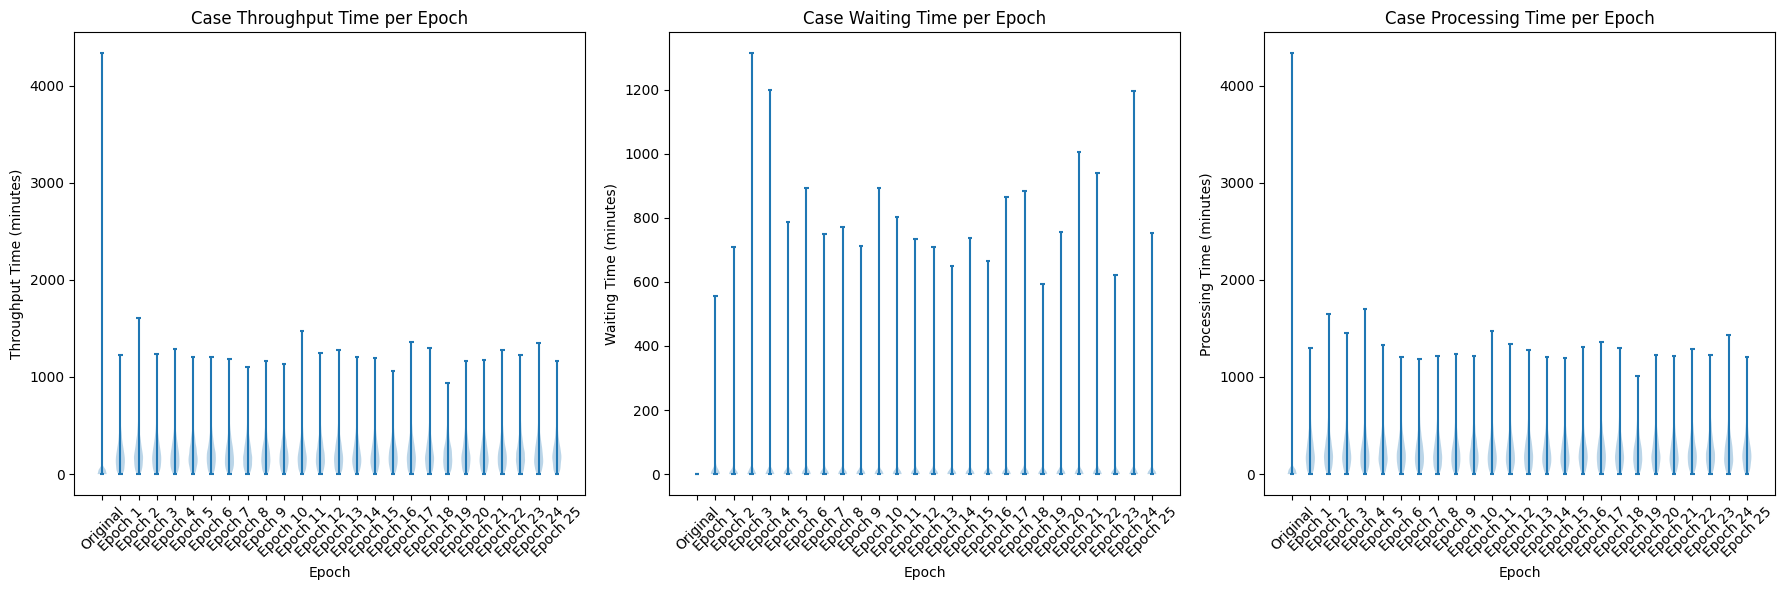

In [13]:
# Sort log files by timestamp
def plot_hist_log_files(log_files: list[str]) -> None:
    log_files_sorted = sorted(log_files, key=lambda x: x.split('_')[-1].split('.')[0])

    # Calculate metrics for all log files
    all_throughput_times = {}
    all_waiting_times = {}
    all_processing_times = {}

    for log_file in log_files_sorted:
        # Extract timestamp for labeling
        timestamp = log_file.split('_')[-1].split('.')[0]

        # Load the log file
        log_df = pd.read_csv(log_file)

        # Calculate throughput, waiting, and processing times
        throughput_times = calculate_throughput_per_agent(log_df)
        waiting_times = calculate_waiting_time_per_agent(log_df)
        processing_times = calculate_processing_time_per_agent(log_df)

        all_throughput_times[timestamp] = throughput_times
        all_waiting_times[timestamp] = waiting_times
        all_processing_times[timestamp] = processing_times

    # Calculate number of log files and create appropriate subplot grid
    num_files = len(log_files_sorted)
    cols = 5
    rows = (num_files + cols - 1) // cols  # Ceiling division

    # Get agent names for consistent legend
    agent_names = get_agent_names()

    # Define consistent color palette for agents
    colors = plt.cm.tab10(range(10))  # type: ignore # Get first 10 colors from tab10
    if len(agent_names) > 10:
        colors = list(colors) + list(plt.cm.tab20(range(10, len(agent_names)))) # type: ignore

    # Create color mapping for each agent
    agent_color_map = {}
    for i, agent_id in enumerate(sorted(agent_names.keys())):
        agent_color_map[agent_id] = colors[i % len(colors)]

    # Create subplot grids
    fig1, axes1 = plt.subplots(rows, cols, figsize=(20, 4*rows))
    fig1.suptitle('Throughput Times for All Log Files', fontsize=16)
    axes1 = axes1.flatten()

    fig2, axes2 = plt.subplots(rows, cols, figsize=(20, 4*rows))
    fig2.suptitle('Waiting Times for All Log Files', fontsize=16)
    axes2 = axes2.flatten()

    fig3, axes3 = plt.subplots(rows, cols, figsize=(20, 4*rows))
    fig3.suptitle('Processing Times for All Log Files', fontsize=16)
    axes3 = axes3.flatten()

    # Track which agents have data for legend purposes
    agents_with_throughput_data = set()
    agents_with_waiting_data = set()
    agents_with_processing_data = set()

    # Plot throughput times
    for i, (timestamp, throughput_data) in enumerate(all_throughput_times.items()):
        ax = axes1[i]
        for agent_id, times in throughput_data.items():
            if times:  # Only plot if there's data
                agents_with_throughput_data.add(agent_id)
                color = agent_color_map[agent_id]
                label = f"{agent_names[int(agent_id)]}" if i == 0 else None
                ax.hist(times, bins=30, alpha=0.5, label=label, color=color)
        ax.set_title(f'Log {i + 1}')
        ax.set_xlabel('Throughput Time (minutes)')
        ax.set_ylabel('Frequency')
        ax.set_yscale('log')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Plot waiting times
    for i, (timestamp, waiting_data) in enumerate(all_waiting_times.items()):
        ax = axes2[i]
        for agent_id, times in waiting_data.items():
            if times and any(t > 0 for t in times):  # Only plot if there's non-zero data
                agents_with_waiting_data.add(agent_id)
                color = agent_color_map[agent_id]
                label = f"{agent_names[int(agent_id)]}" if i == 0 else None
                ax.hist([t for t in times if t > 0], bins=30, alpha=0.5, label=label, color=color)
        ax.set_title(f'Log {i + 1}')
        ax.set_xlabel('Waiting Time (minutes)')
        ax.set_ylabel('Frequency')
        ax.set_yscale('log')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Plot processing times
    for i, (timestamp, processing_data) in enumerate(all_processing_times.items()):
        ax = axes3[i]
        for agent_id, times in processing_data.items():
            if times:  # Only plot if there's data
                agents_with_processing_data.add(agent_id)
                color = agent_color_map[agent_id]
                label = f"{agent_names[int(agent_id)]}" if i == 0 else None
                ax.hist(times, bins=30, alpha=0.5, label=label, color=color)
        ax.set_title(f'Log {i + 1}')
        ax.set_xlabel('Processing Time (minutes)')
        ax.set_ylabel('Frequency')
        ax.set_yscale('log')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Hide empty subplots
    for i in range(num_files, len(axes1)):
        axes1[i].set_visible(False)
    for i in range(num_files, len(axes2)):
        axes2[i].set_visible(False)
    for i in range(num_files, len(axes3)):
        axes3[i].set_visible(False)

    # Add single legend for each figure
    if agents_with_throughput_data:
        fig1.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98))
    if agents_with_waiting_data:
        fig2.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98))
    if agents_with_processing_data:
        fig3.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98))

    plt.tight_layout()
    plt.show()

def box_plot_log_files(log_files):
    """
    Plots box plots for each log file (epoch) for throughput, waiting, and processing times.
    X-axis: Epoch i (starting at 1)
    Y-axis: Distribution of case metrics for that epoch.
    """
    # Sort log files by timestamp for consistent epoch order
    log_files = list(set(log_files))
    def sorting_key(log_file):
        # Extract the timestamp from the filename, and sort by earliest to latest
        return log_file.split('_')[-1].split('.')[0]
    log_files_sorted = sorted(log_files, key=sorting_key)
    # Remove duplicates
    log_files_sorted = list(dict.fromkeys(log_files_sorted))

    case_groups = original_log_files.groupby('case_id')

    # Throughput time per case
    throughput_times = []
    waiting_times = []
    processing_times = []
    for case_id, group in case_groups:
        # Convert timestamps once for the entire group
        group_times = group[['start_timestamp', 'end_timestamp']].copy()
        for col in group_times.columns:
            group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
        
        # Calculate waiting and processing times vectorized
        waiting_times_vec = (group_times['start_timestamp'] - group_times['start_timestamp']).dt.total_seconds() / 60
        processing_times_vec = (group_times['end_timestamp'] - group_times['start_timestamp']).dt.total_seconds() / 60
        throughput_times_vec = (group_times['end_timestamp'] - group_times['start_timestamp']).dt.total_seconds() / 60
        
        # Sum up the times for the case
        waiting = waiting_times_vec.sum()
        processing = processing_times_vec.sum()
        throughput = throughput_times_vec.sum()
        
        waiting_times.append(waiting)
        processing_times.append(processing)
        throughput_times.append(throughput)
    
    throughput_per_epoch = [throughput_times]
    waiting_per_epoch = [waiting_times]
    processing_per_epoch = [processing_times]
    epoch_labels = ['Original']
    processed_files = set()

    for i, log_file in enumerate(log_files_sorted):
        if log_file in processed_files:
            continue
        processed_files.add(log_file)
        print(f"Processing log file: {log_file}")
        log_df = pd.read_csv(log_file)
        # Calculate metrics per case (not per agent)
        # Group by case_id and compute mean for each metric per case
        case_groups = log_df.groupby('case_id')

        # Throughput time per case
        throughput_times = []
        waiting_times = []
        processing_times = []
        for case_id, group in case_groups:
            # Convert timestamps once for the entire group
            group_times = group[['task_assigned_time', 'task_started_time', 'task_completed_time']].copy()
            for col in group_times.columns:
                group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
            
            # Calculate waiting and processing times vectorized
            waiting_times_vec = (group_times['task_started_time'] - group_times['task_assigned_time']).dt.total_seconds() / 60
            processing_times_vec = (group_times['task_completed_time'] - group_times['task_assigned_time']).dt.total_seconds() / 60
            throughput_times_vec = (group_times['task_completed_time'] - group_times['task_started_time']).dt.total_seconds() / 60
            
            # Sum up the times for the case
            waiting = waiting_times_vec.sum()
            processing = processing_times_vec.sum()
            throughput = throughput_times_vec.sum()
            
            waiting_times.append(waiting)
            processing_times.append(processing)
            throughput_times.append(throughput)

        # Append to lists for box plots
        throughput_per_epoch.append(throughput_times)
        waiting_per_epoch.append(waiting_times)
        processing_per_epoch.append(processing_times)
        epoch_labels.append(f"Epoch {i+1}")

    # Plot box plots for each metric
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    axes[0].violinplot(throughput_per_epoch, positions=range(1, len(throughput_per_epoch) + 1))
    axes[0].set_xticks(range(1, len(epoch_labels) + 1))
    axes[0].set_xticklabels(epoch_labels, rotation=45)
    axes[0].set_title("Case Throughput Time per Epoch")
    axes[0].set_ylabel("Throughput Time (minutes)")
    axes[0].set_xlabel("Epoch")

    axes[1].violinplot(waiting_per_epoch, positions=range(1, len(waiting_per_epoch) + 1))
    axes[1].set_xticks(range(1, len(epoch_labels) + 1))
    axes[1].set_xticklabels(epoch_labels, rotation=45)
    axes[1].set_title("Case Waiting Time per Epoch")
    axes[1].set_ylabel("Waiting Time (minutes)")
    axes[1].set_xlabel("Epoch")

    axes[2].violinplot(processing_per_epoch, positions=range(1, len(processing_per_epoch) + 1))
    axes[2].set_xticks(range(1, len(epoch_labels) + 1))
    axes[2].set_xticklabels(epoch_labels, rotation=45)
    axes[2].set_title("Case Processing Time per Epoch")
    axes[2].set_ylabel("Processing Time (minutes)")
    axes[2].set_xlabel("Epoch")

    plt.tight_layout()
    plt.show()

# Plot histograms for the selected log files
# plot_hist_log_files(log_files)

# Call the function to plot log files
box_plot_log_files(log_files)

## Metrics on evaluation with mean metric


Selected log files for date 20250528: ['../../data/logs/mean_metric/evaluation/log_20250528_231324.csv', '../../data/logs/mean_metric/evaluation/log_20250528_231254.csv', '../../data/logs/mean_metric/evaluation/log_20250528_231309.csv', '../../data/logs/mean_metric/evaluation/log_20250528_231447.csv', '../../data/logs/mean_metric/evaluation/log_20250528_231356.csv', '../../data/logs/mean_metric/evaluation/log_20250528_231340.csv', '../../data/logs/mean_metric/evaluation/log_20250528_231427.csv', '../../data/logs/mean_metric/evaluation/log_20250528_231238.csv', '../../data/logs/mean_metric/evaluation/log_20250528_231411.csv', '../../data/logs/mean_metric/evaluation/log_20250528_231505.csv']


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/2321018517.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_throughput_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/4111664505.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby(

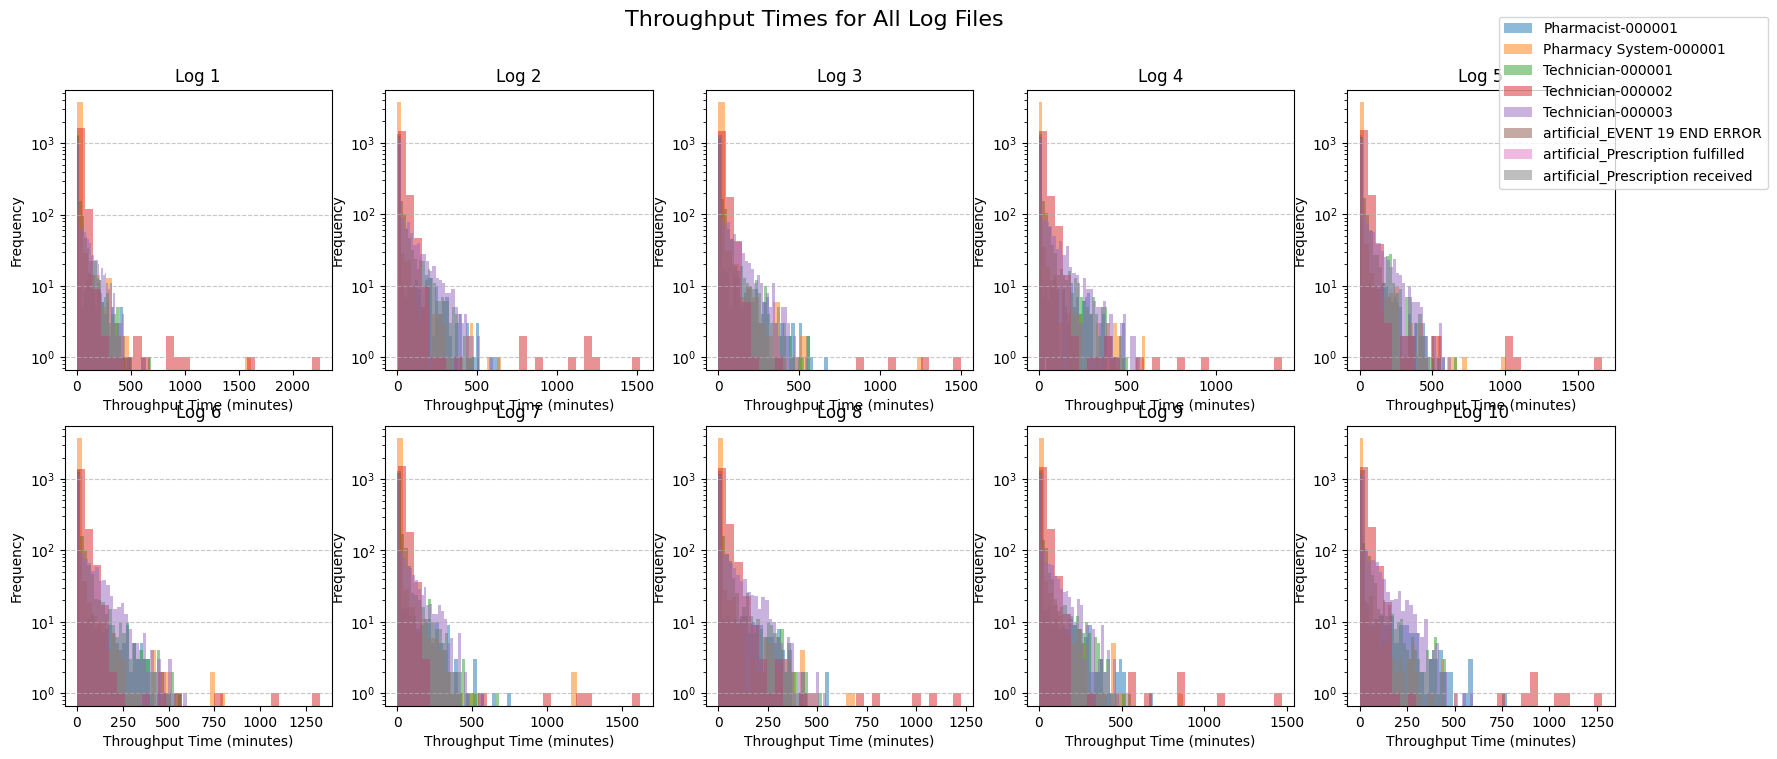

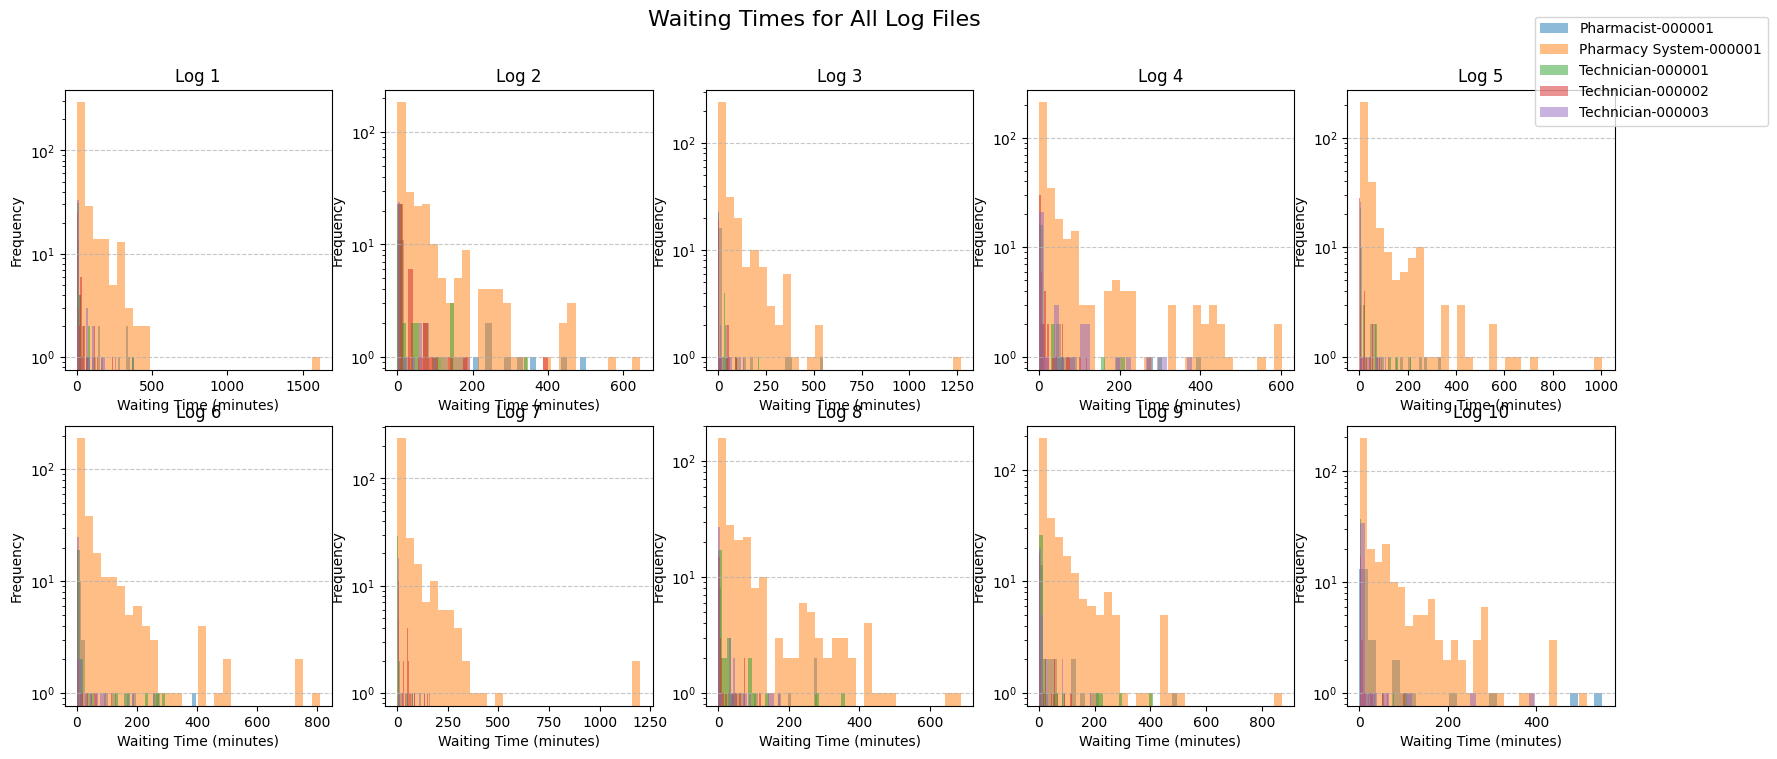

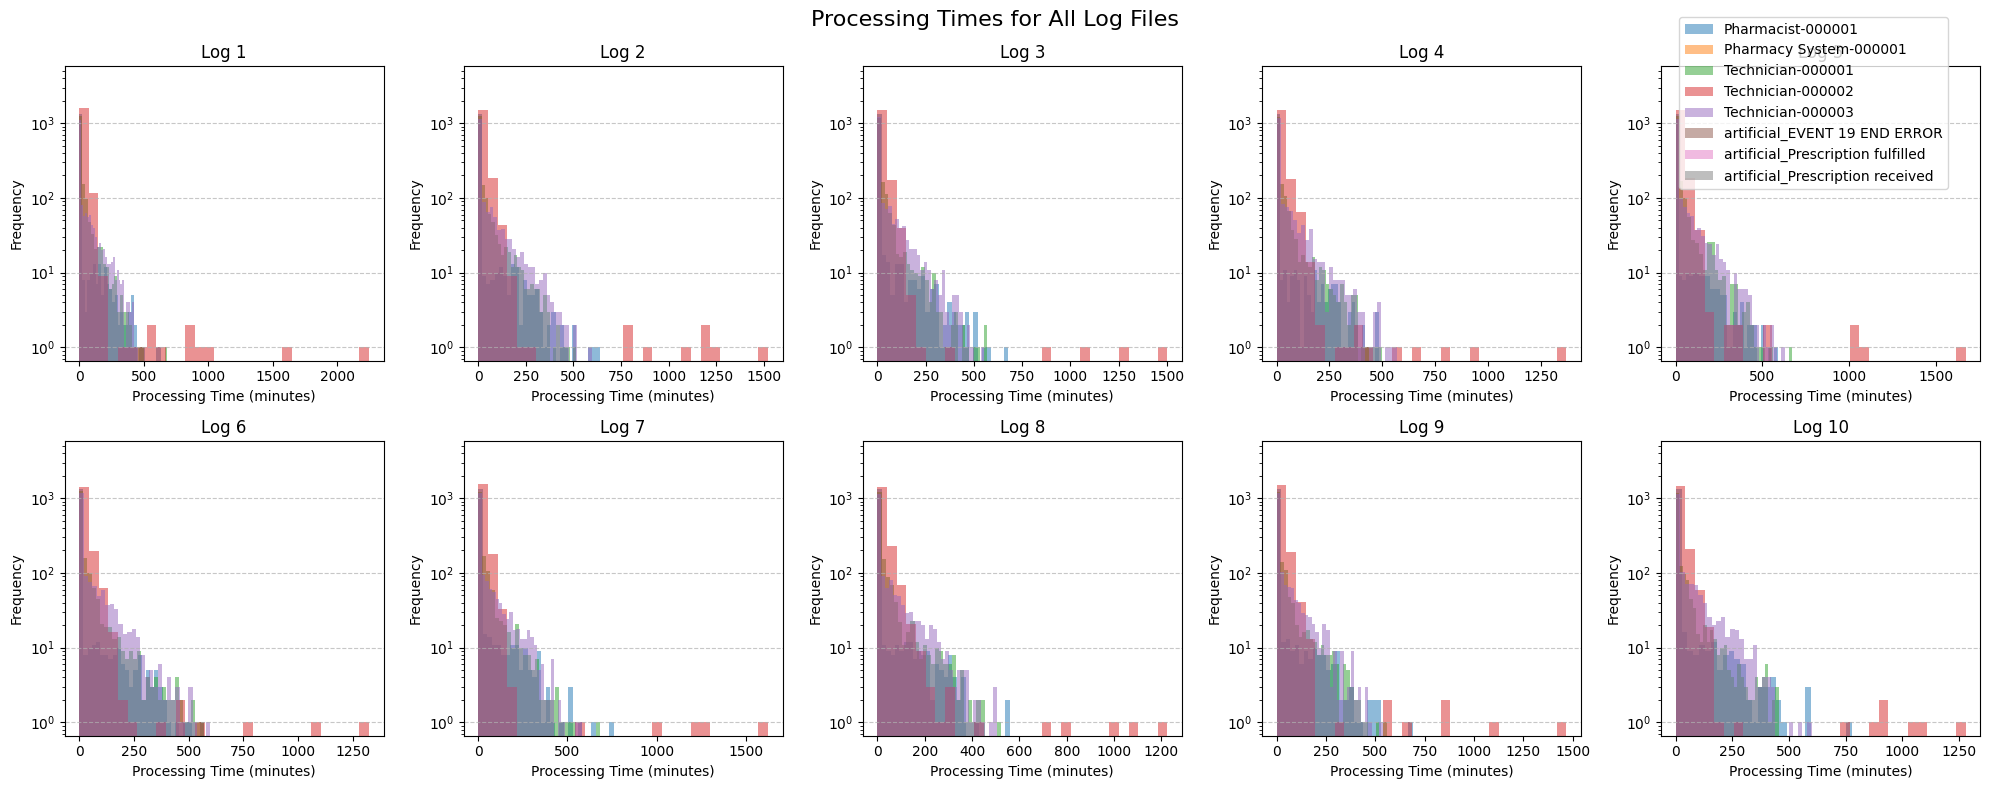

Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231238.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231254.csv
Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231309.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')


Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231324.csv
Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231340.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231356.csv
Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231411.csv
Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231427.csv
Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231447.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_metric/evaluation/log_20250528_231505.csv


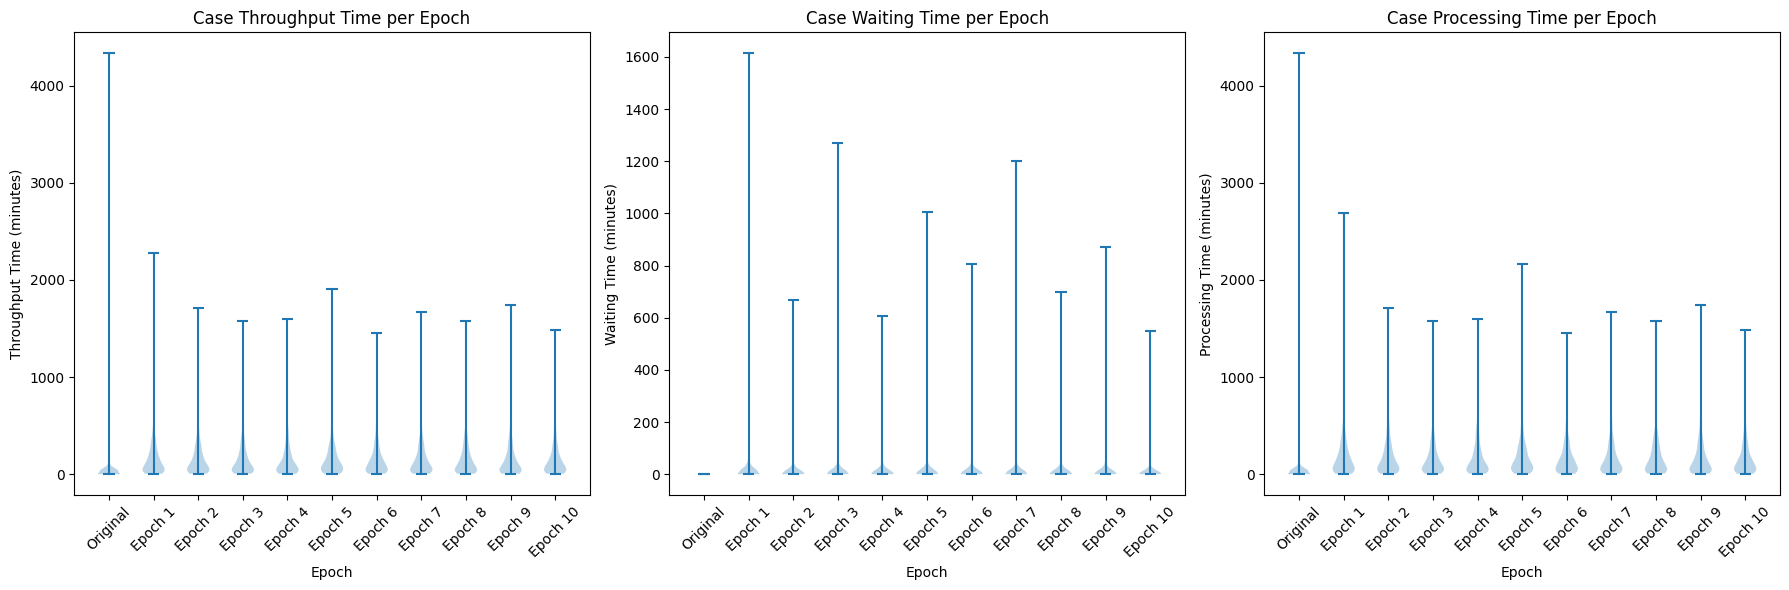

In [14]:
# Select and plot log files for the specified date
date = '20250528'
logs_directory = '../../data/logs/mean_metric/evaluation'
log_files = select_log_files(logs_directory, date)
print(f"Selected log files for date {date}: {log_files}")
plot_hist_log_files(log_files)
box_plot_log_files(log_files)


## Metrics on training with median metric

/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/2321018517.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_throughput_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/4111664505.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby(

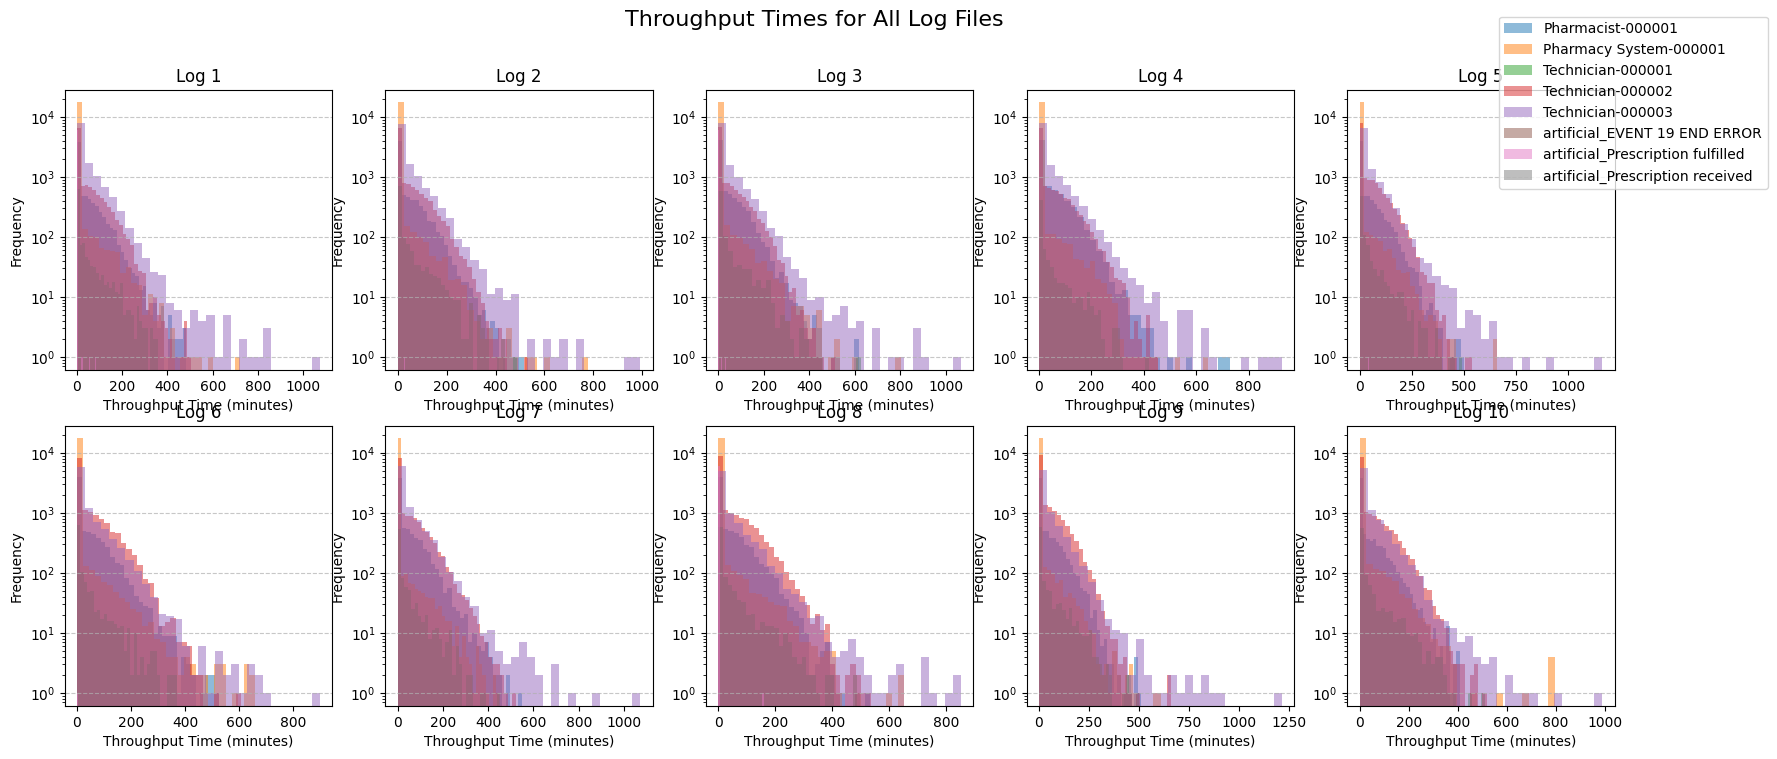

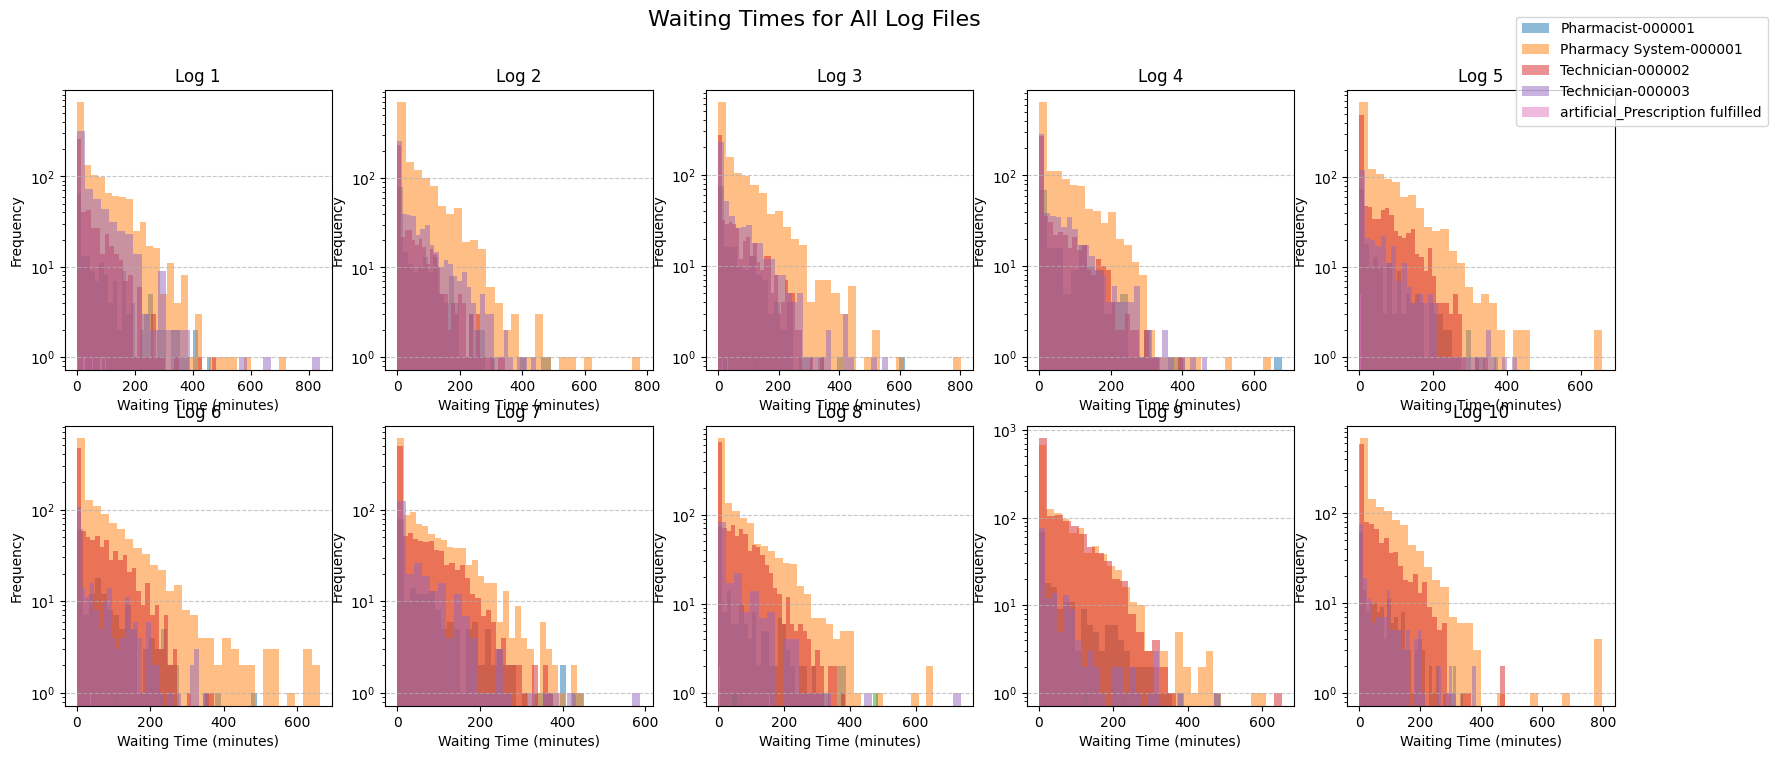

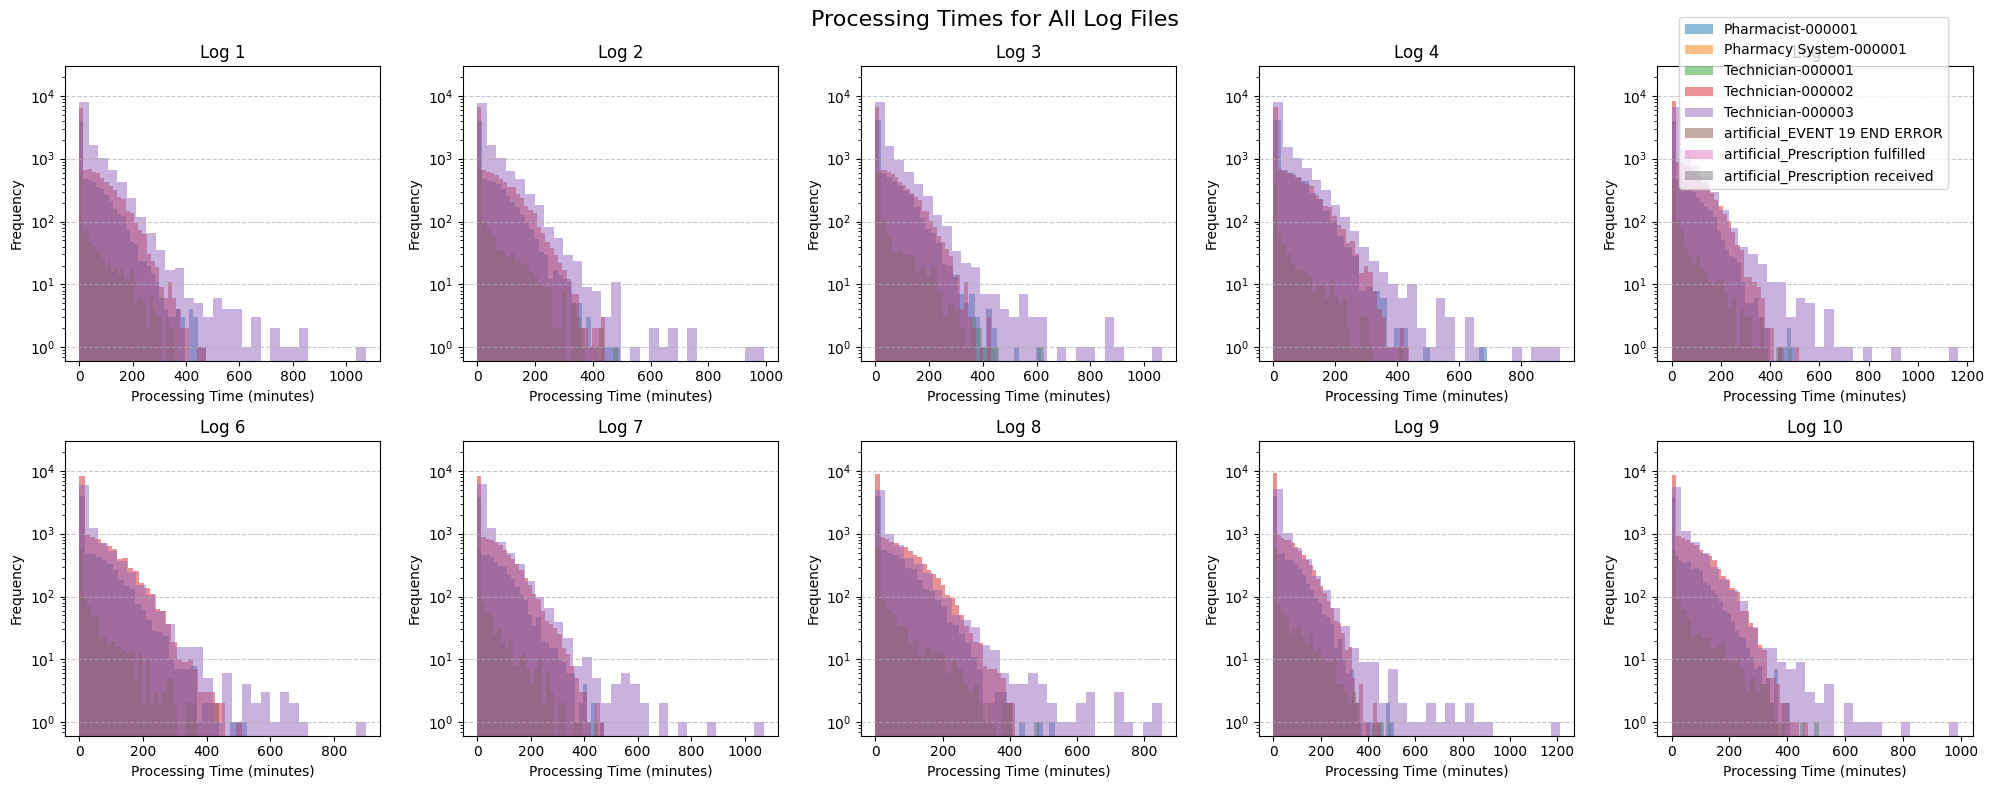

Processing log file: ../../data/logs/median_metric/training/log_20250601_121024.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/training/log_20250601_140817.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')


Processing log file: ../../data/logs/median_metric/training/log_20250601_155755.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/training/log_20250601_162440.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/training/log_20250601_164123.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/training/log_20250601_165832.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/training/log_20250601_171631.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/training/log_20250601_181114.csv
Processing log file: ../../data/logs/median_metric/training/log_20250601_182829.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/training/log_20250601_184602.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

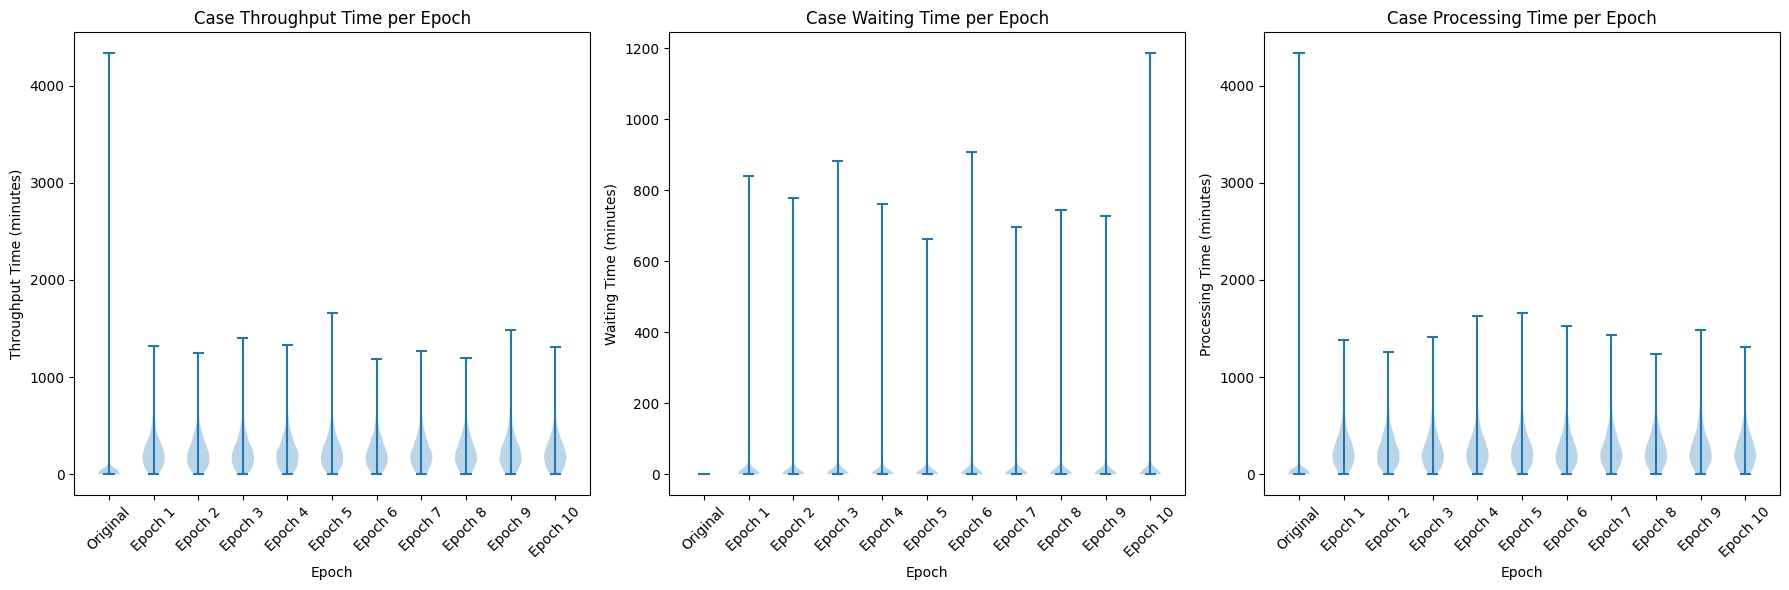

In [15]:
# Select and plot log files for the specified date
date = '20250601'
logs_directory = '../../data/logs/median_metric/training/'
log_files = select_log_files(logs_directory, date)
plot_hist_log_files(log_files)
box_plot_log_files(log_files)


## Metrics on training with median metric

/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/2321018517.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_throughput_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/4111664505.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby(

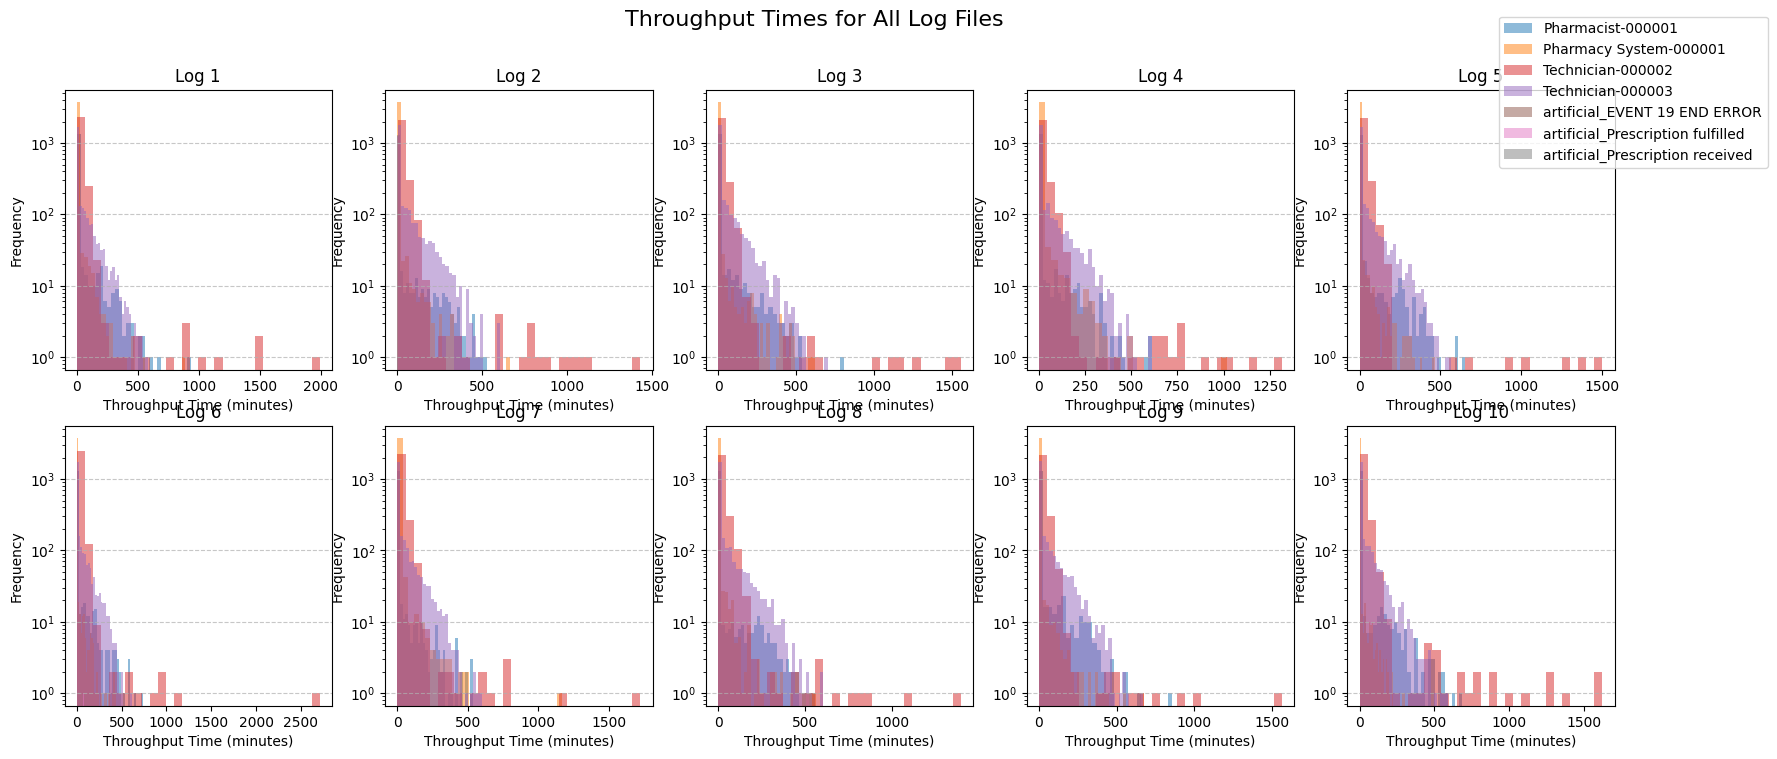

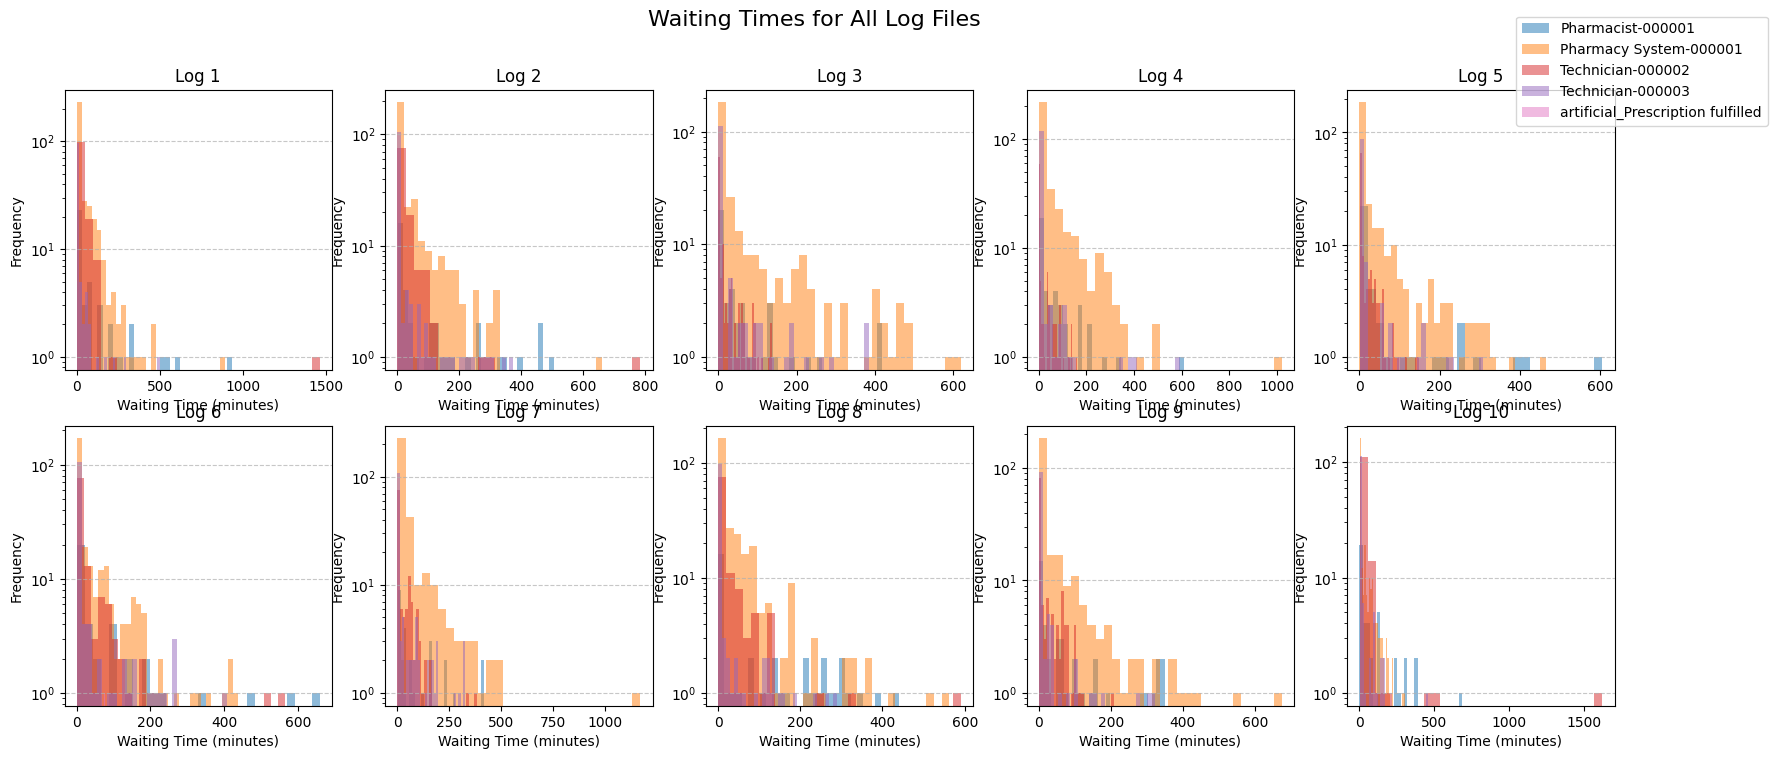

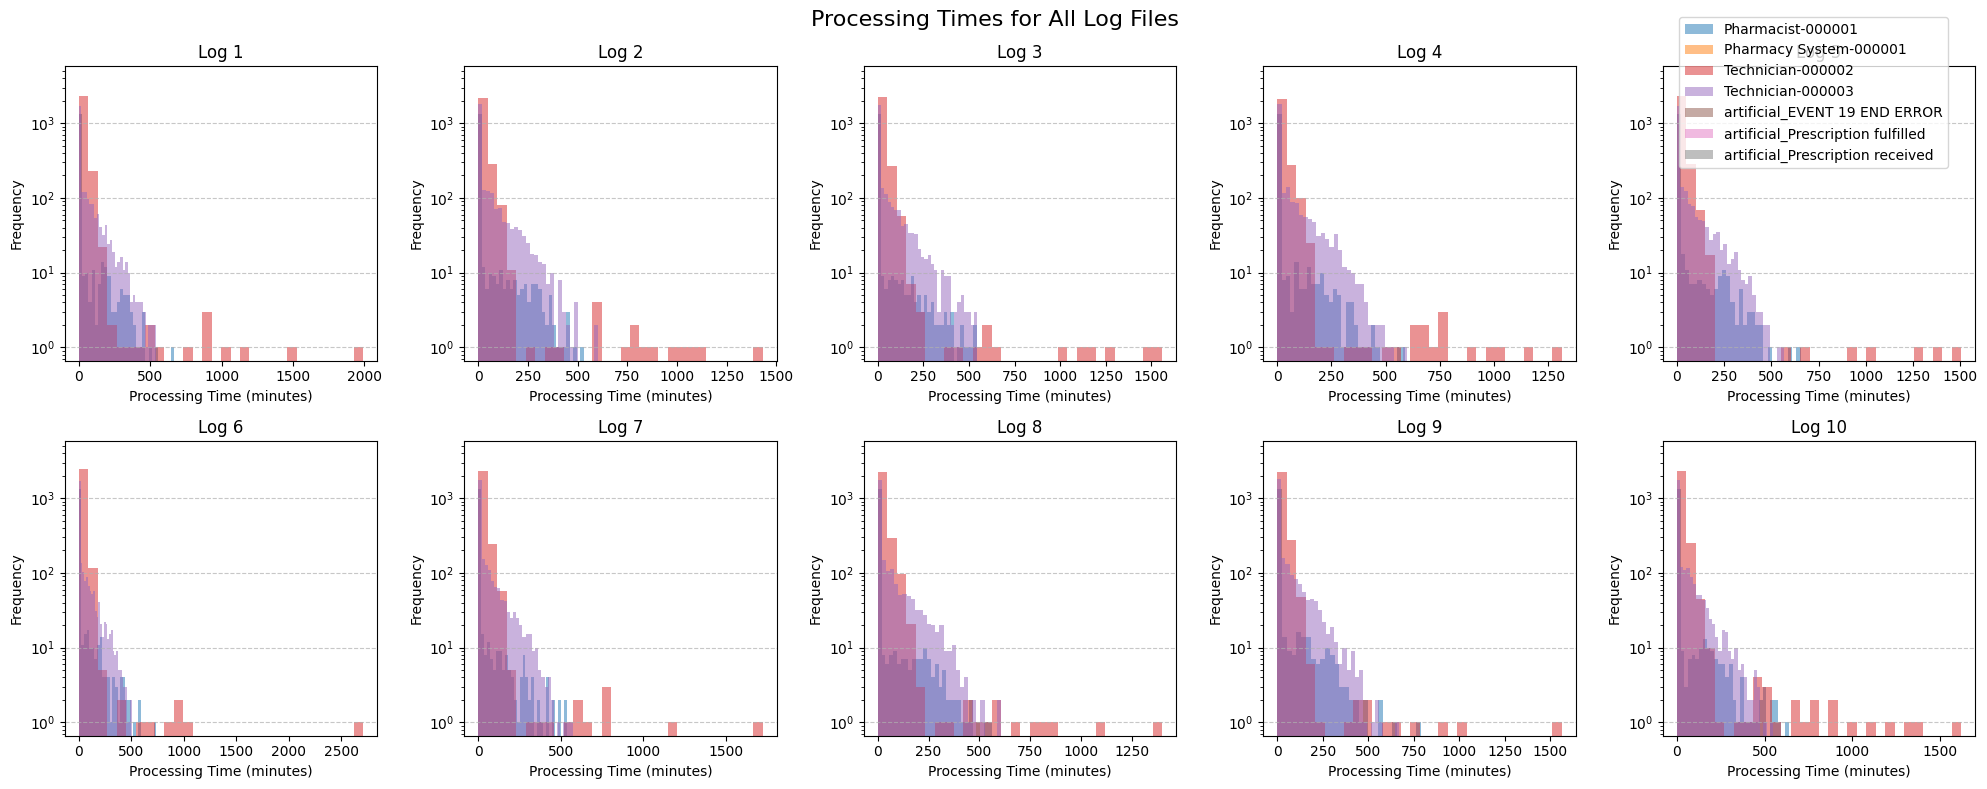

Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_210907.csv
Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_210922.csv
Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_212639.csv
Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_212701.csv
Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_220333.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_220349.csv
Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_220407.csv
Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_220422.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_220437.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/median_metric/evaluation/log_20250601_220453.csv


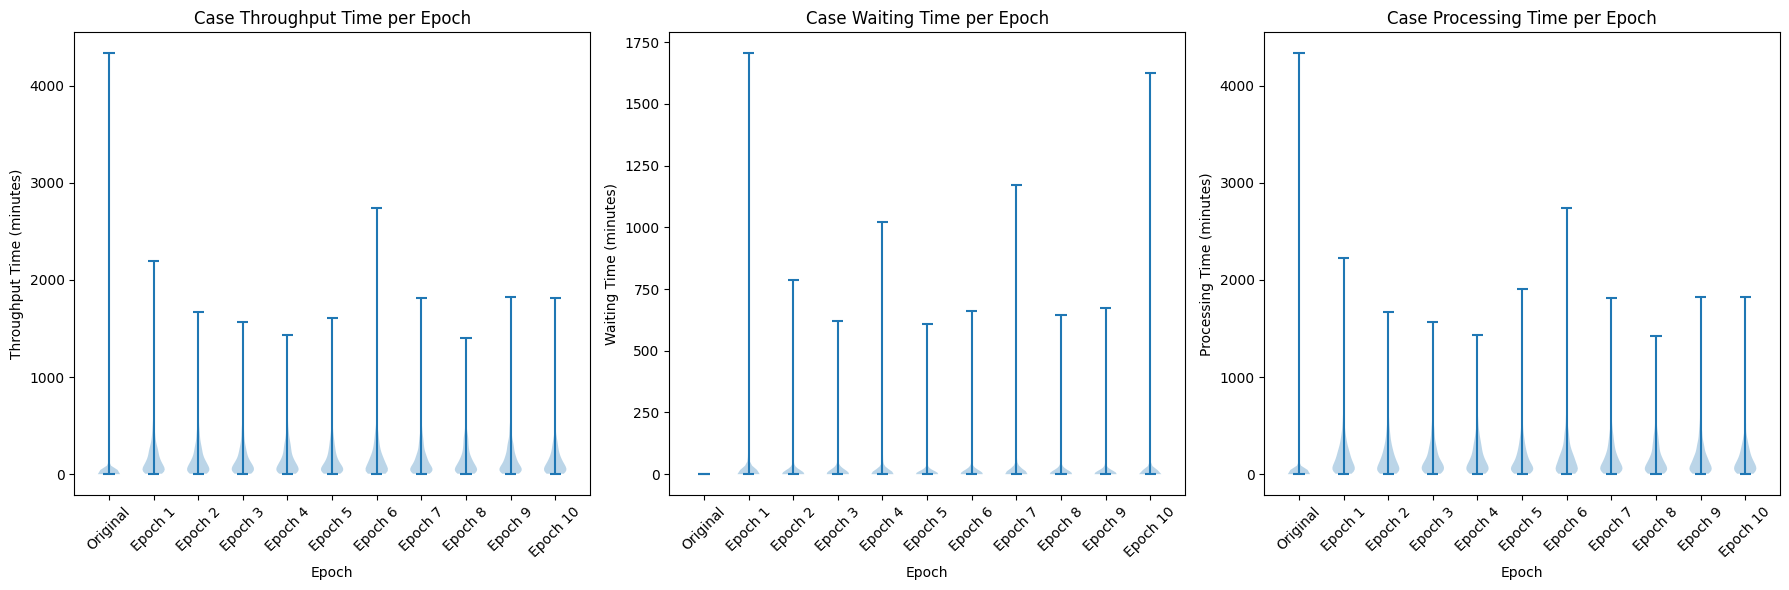

In [16]:
# Select and plot log files for the specified date
date = '20250601'
logs_directory = '../../data/logs/median_metric/evaluation/'
log_files = select_log_files(logs_directory, date)
plot_hist_log_files(log_files)
box_plot_log_files(log_files)

## Metrics on training with mean & median metric


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/2321018517.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_throughput_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/4111664505.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby(

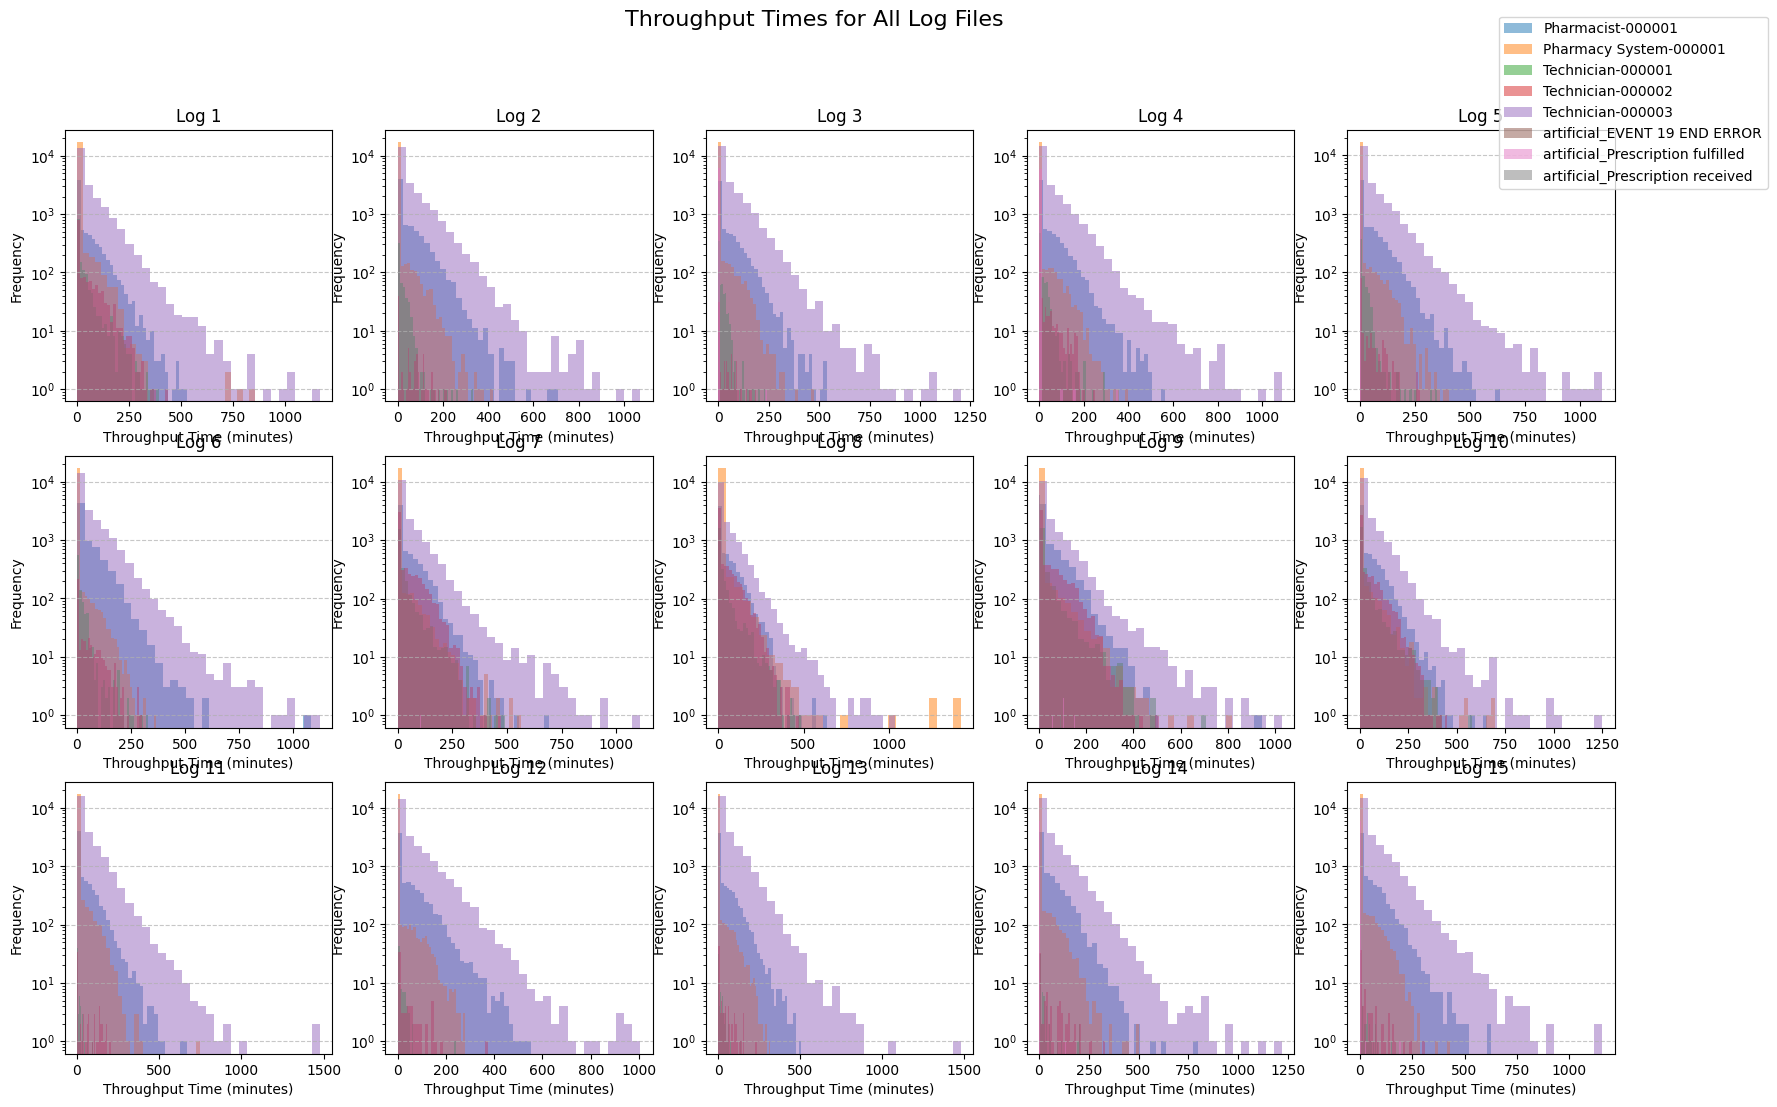

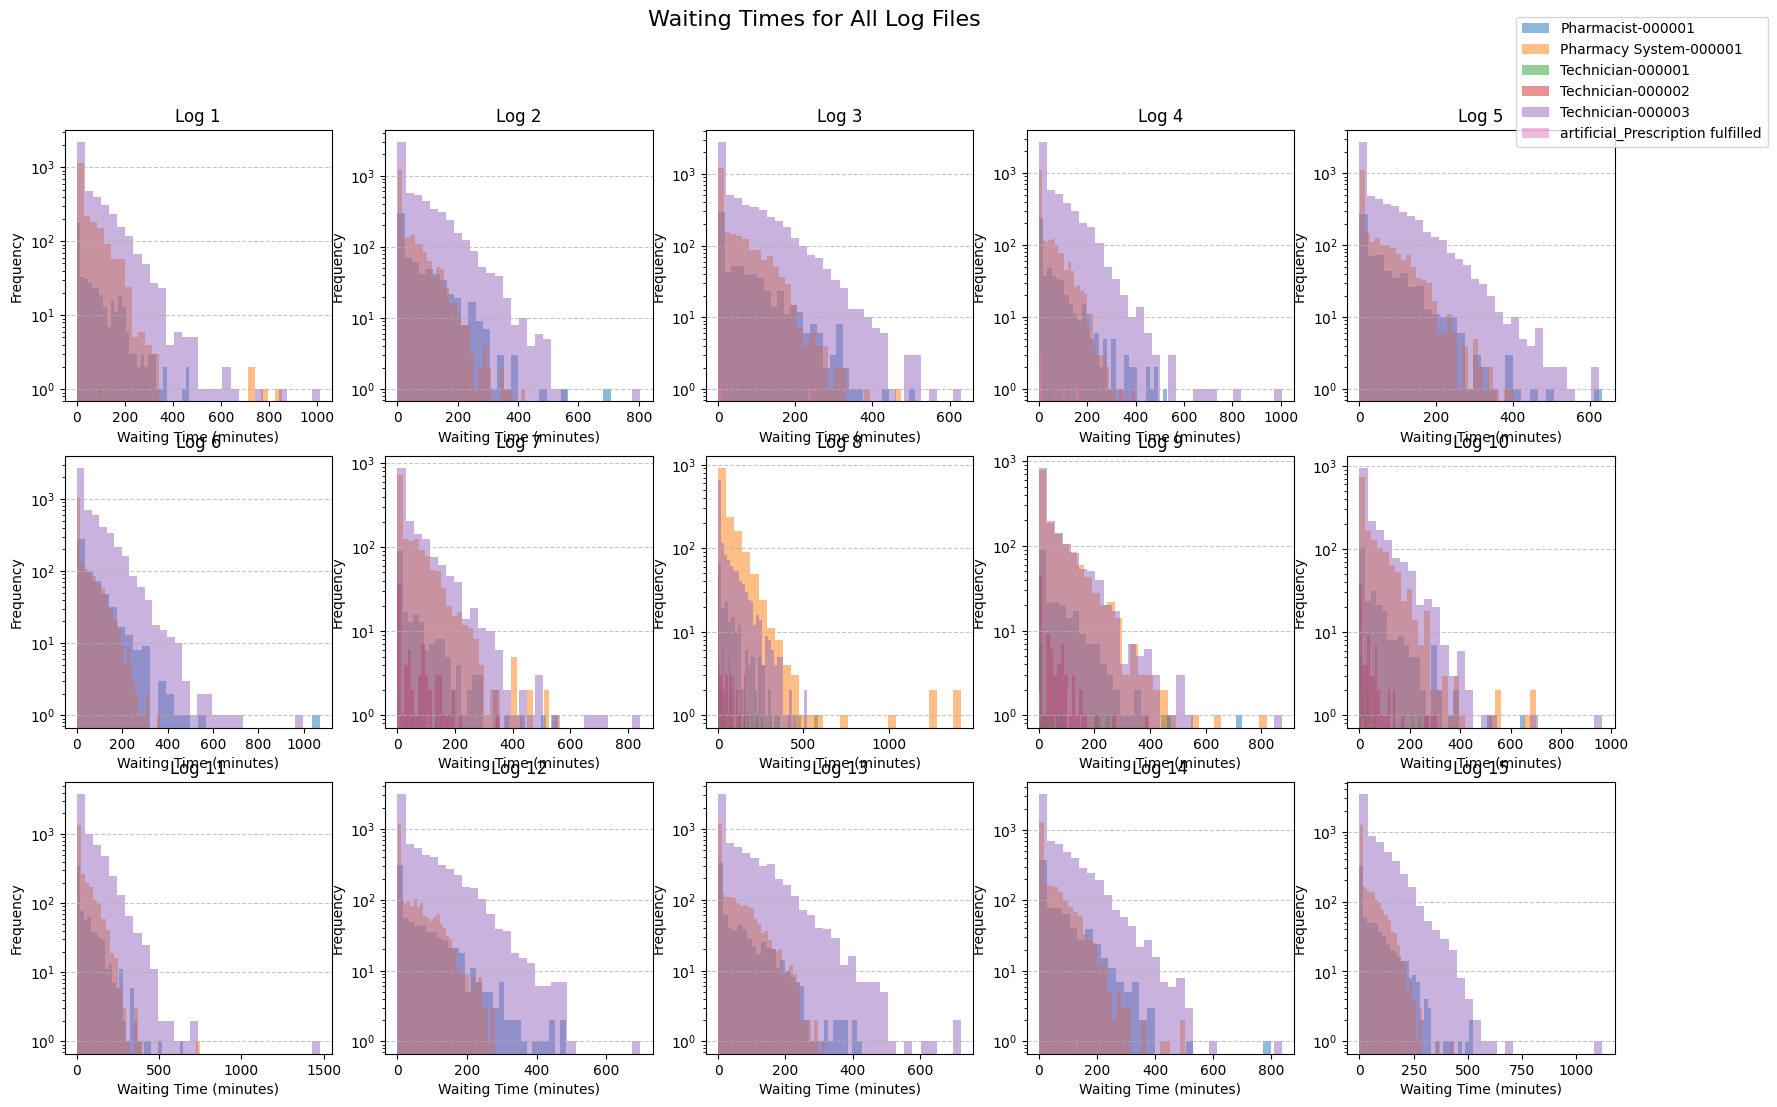

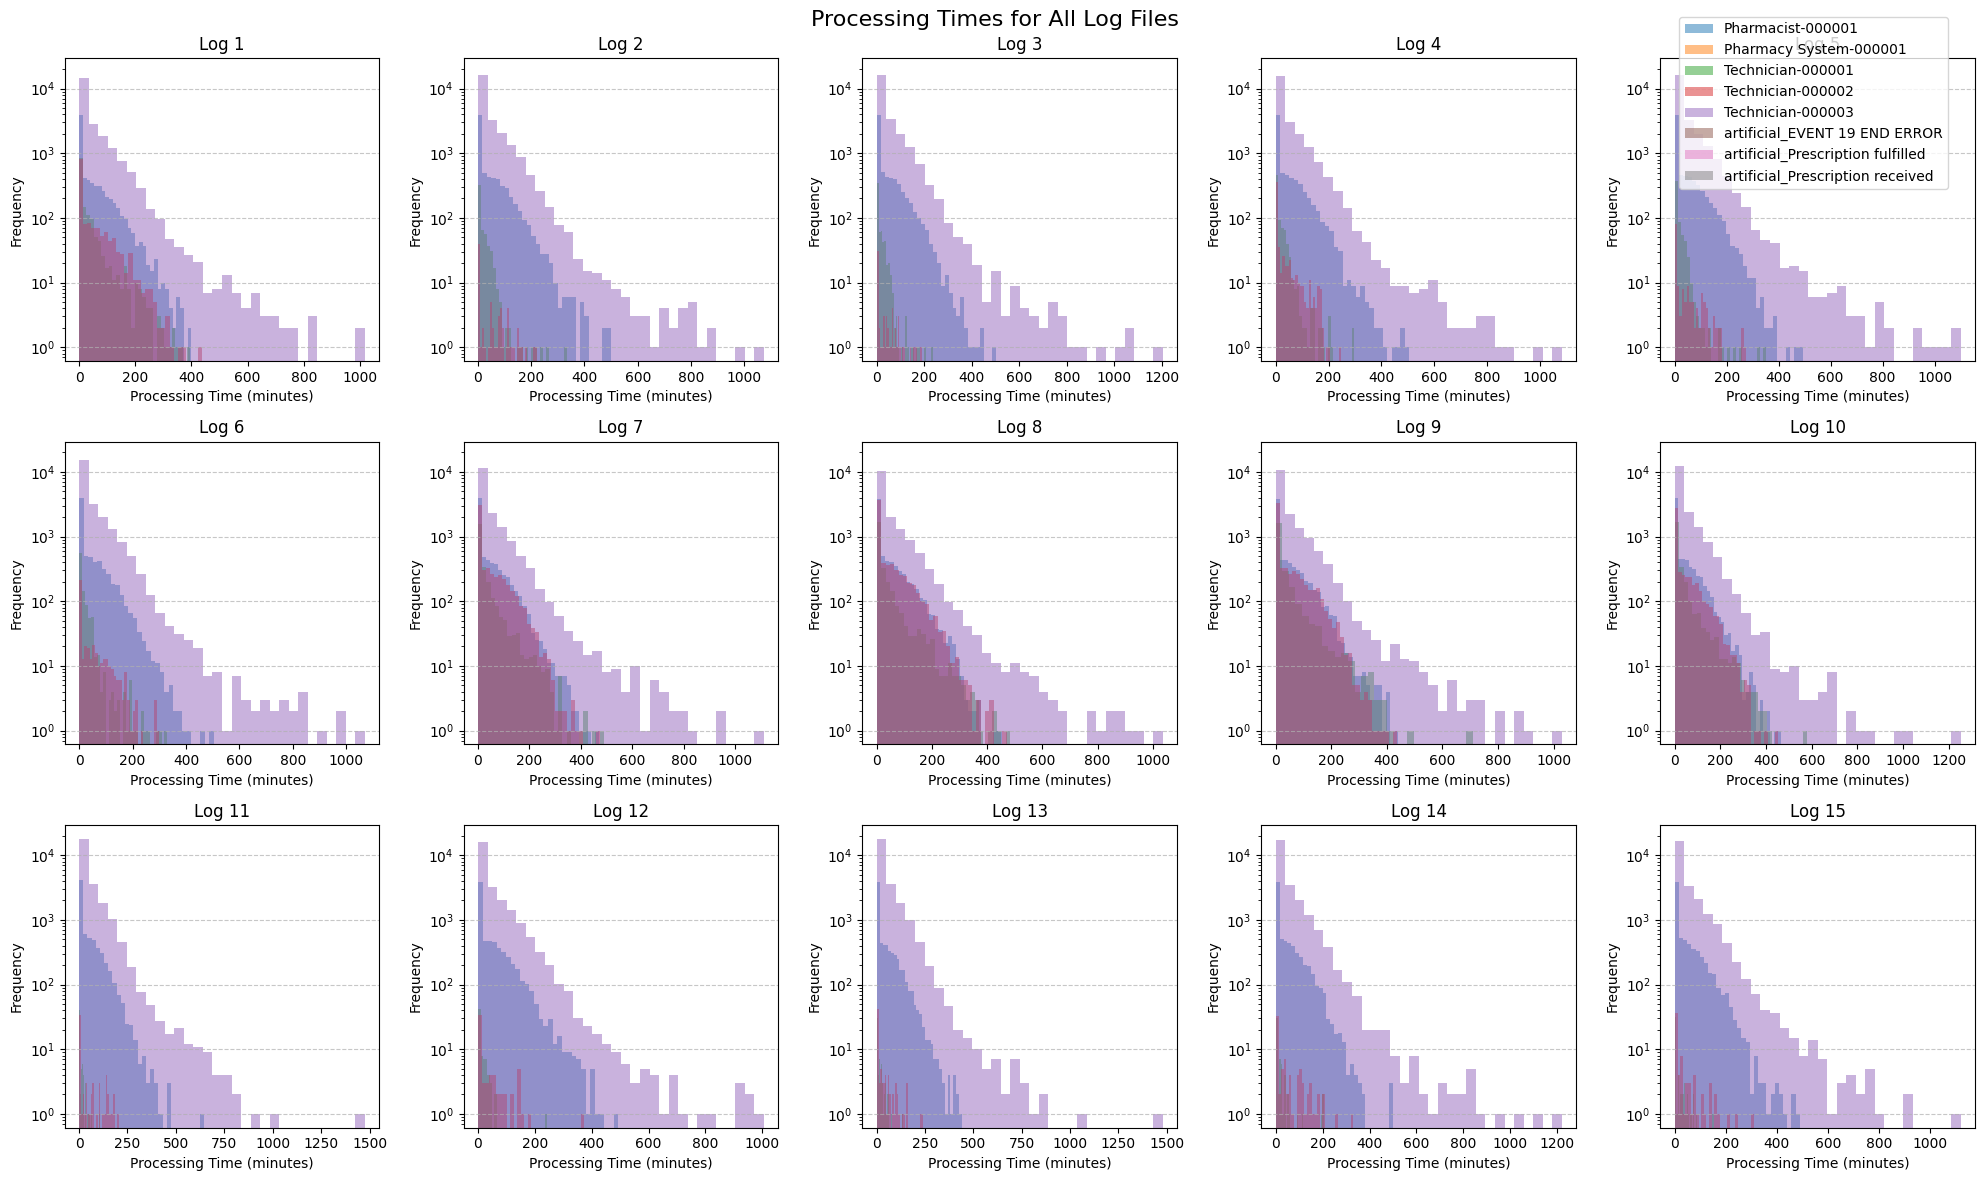

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_012346.csv
Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_014100.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_015814.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_021529.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_023245.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_024948.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_030656.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_032356.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_034120.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_035844.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_041607.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_041834.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_042100.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')


Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_042327.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/training/log_20250529_042554.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

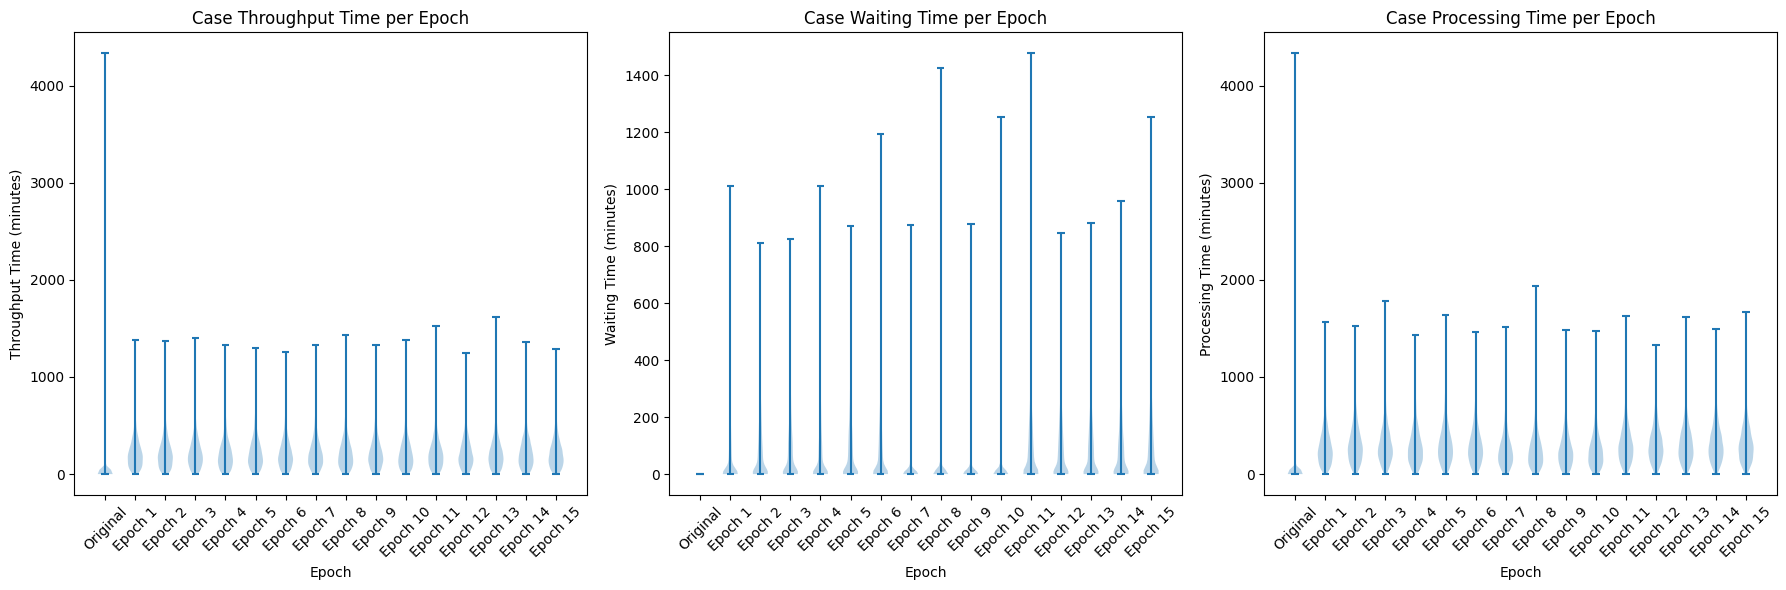

In [17]:
# Select and plot log files for the specified date
date = '20250529'
logs_directory = '../../data/logs/mean_median_metric/training/'
log_files = select_log_files(logs_directory, date)
plot_hist_log_files(log_files)
box_plot_log_files(log_files)

## Metrics on evaluation with mean & median metric


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/2321018517.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_throughput_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/4111664505.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby(

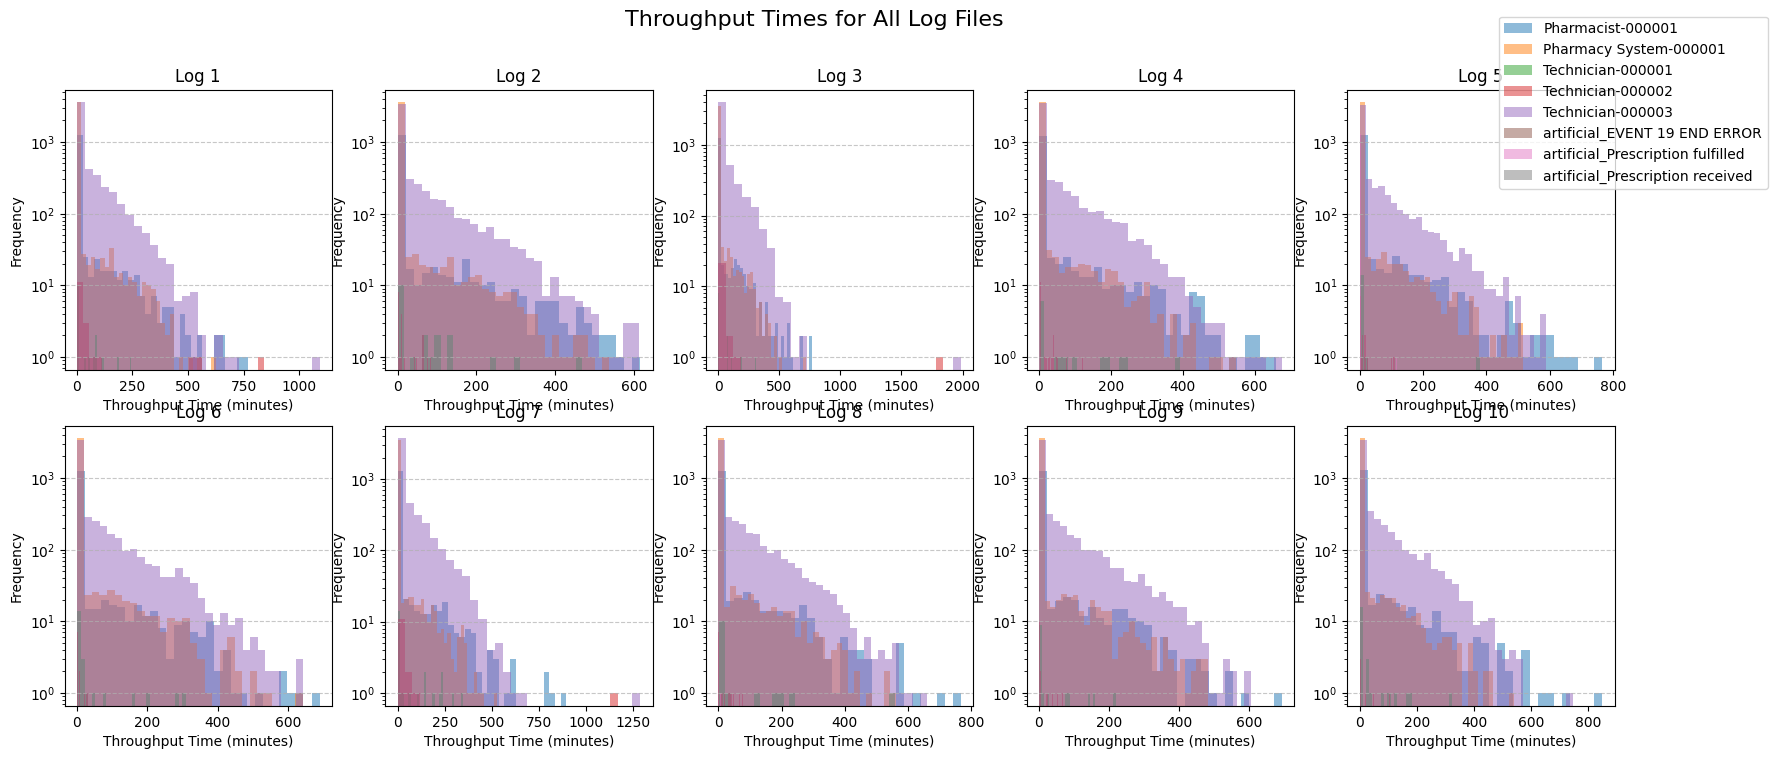

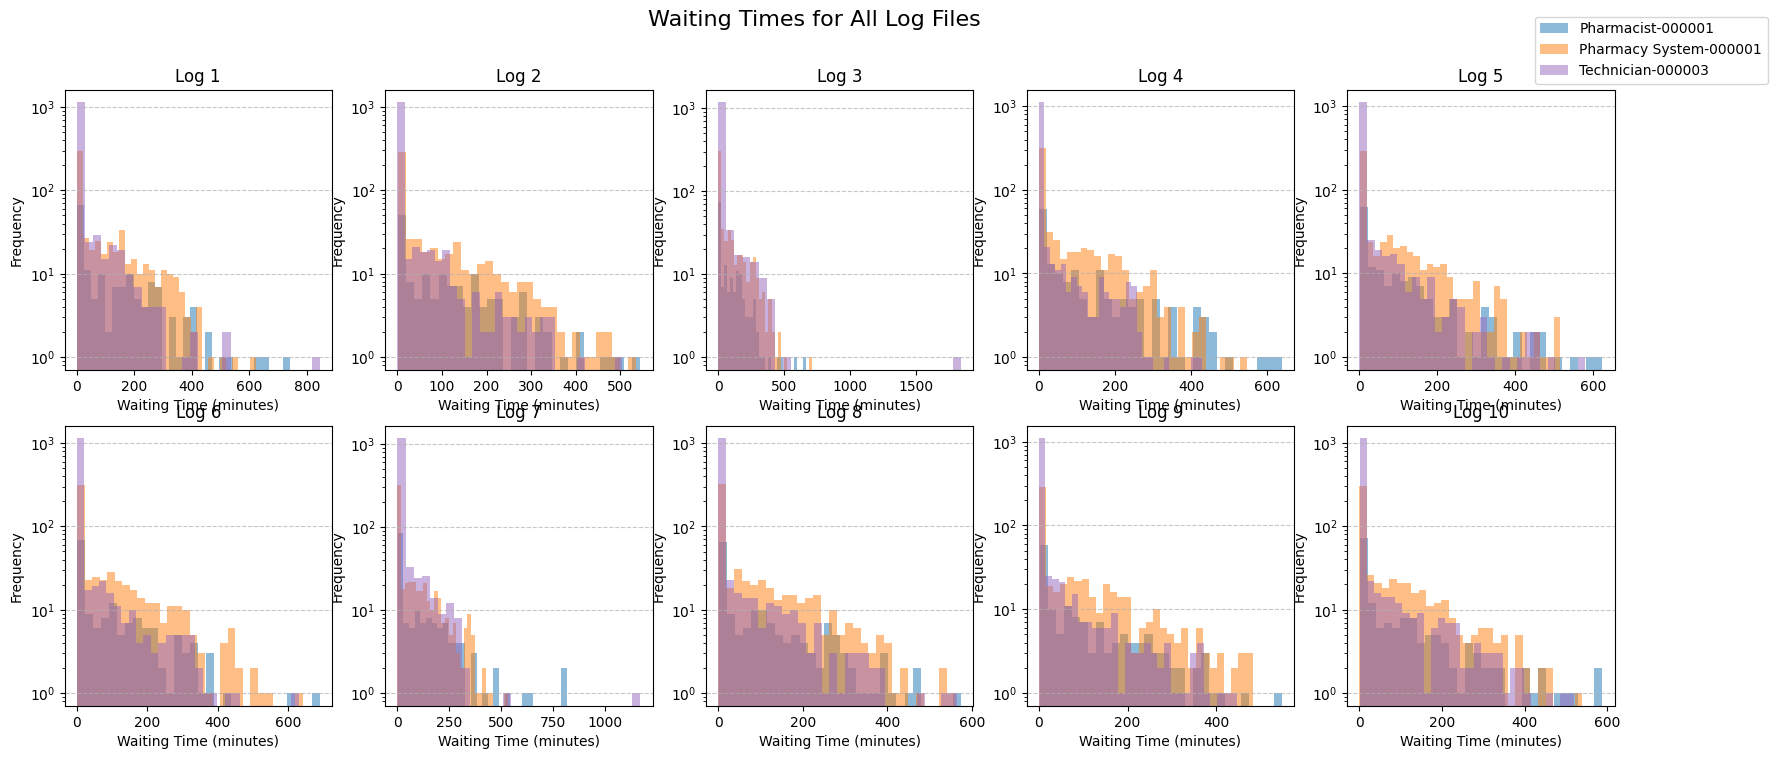

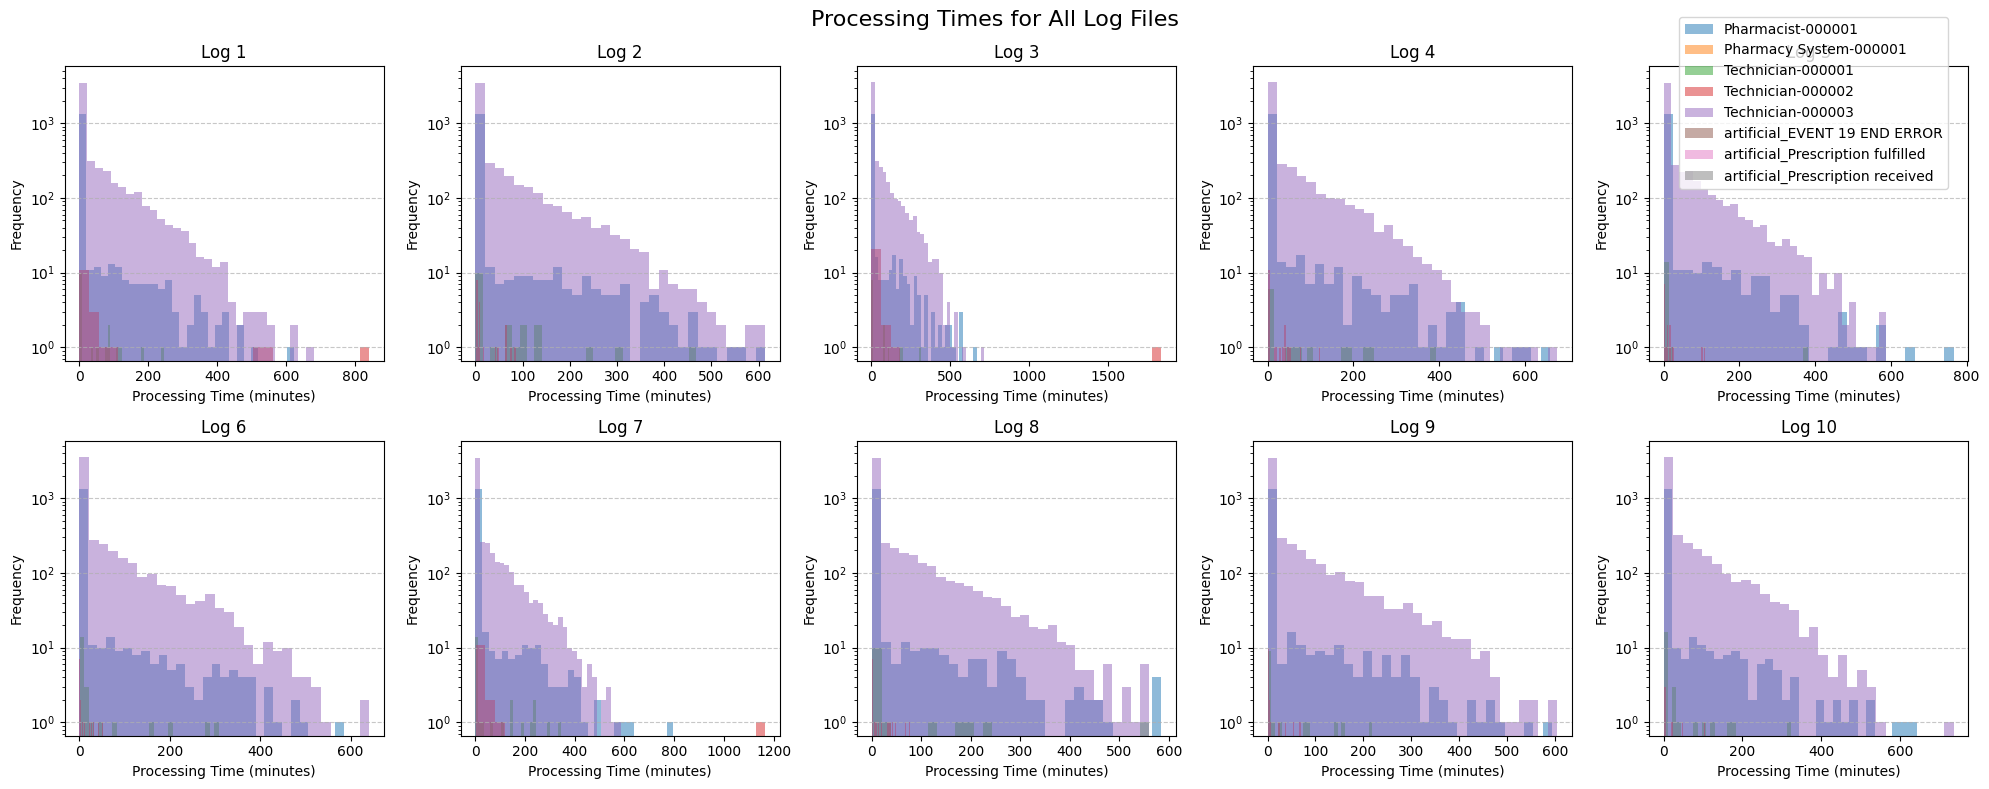

Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113628.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113644.csv
Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113701.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113717.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113732.csv
Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113747.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')


Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113803.csv
Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113818.csv
Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113834.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_metric/evaluation/log_20250601_113850.csv


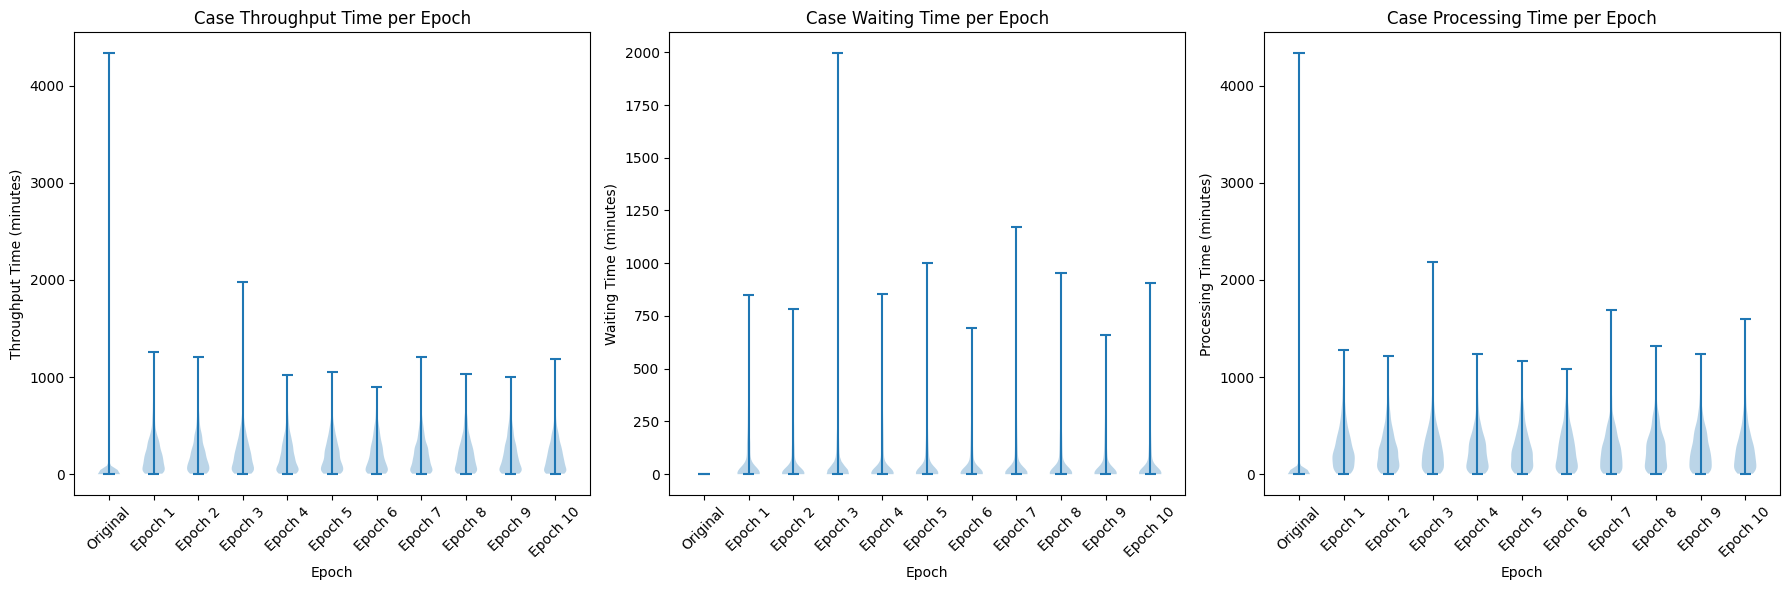

In [18]:
# Select and plot log files for the specified date
date = '20250601'
logs_directory = '../../data/logs/mean_median_metric/evaluation/'
log_files = select_log_files(logs_directory, date)
plot_hist_log_files(log_files)
box_plot_log_files(log_files)

## Metrics on training with mean, median & std metric and deeper and wider networks

/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/2321018517.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_throughput_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/4111664505.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby(

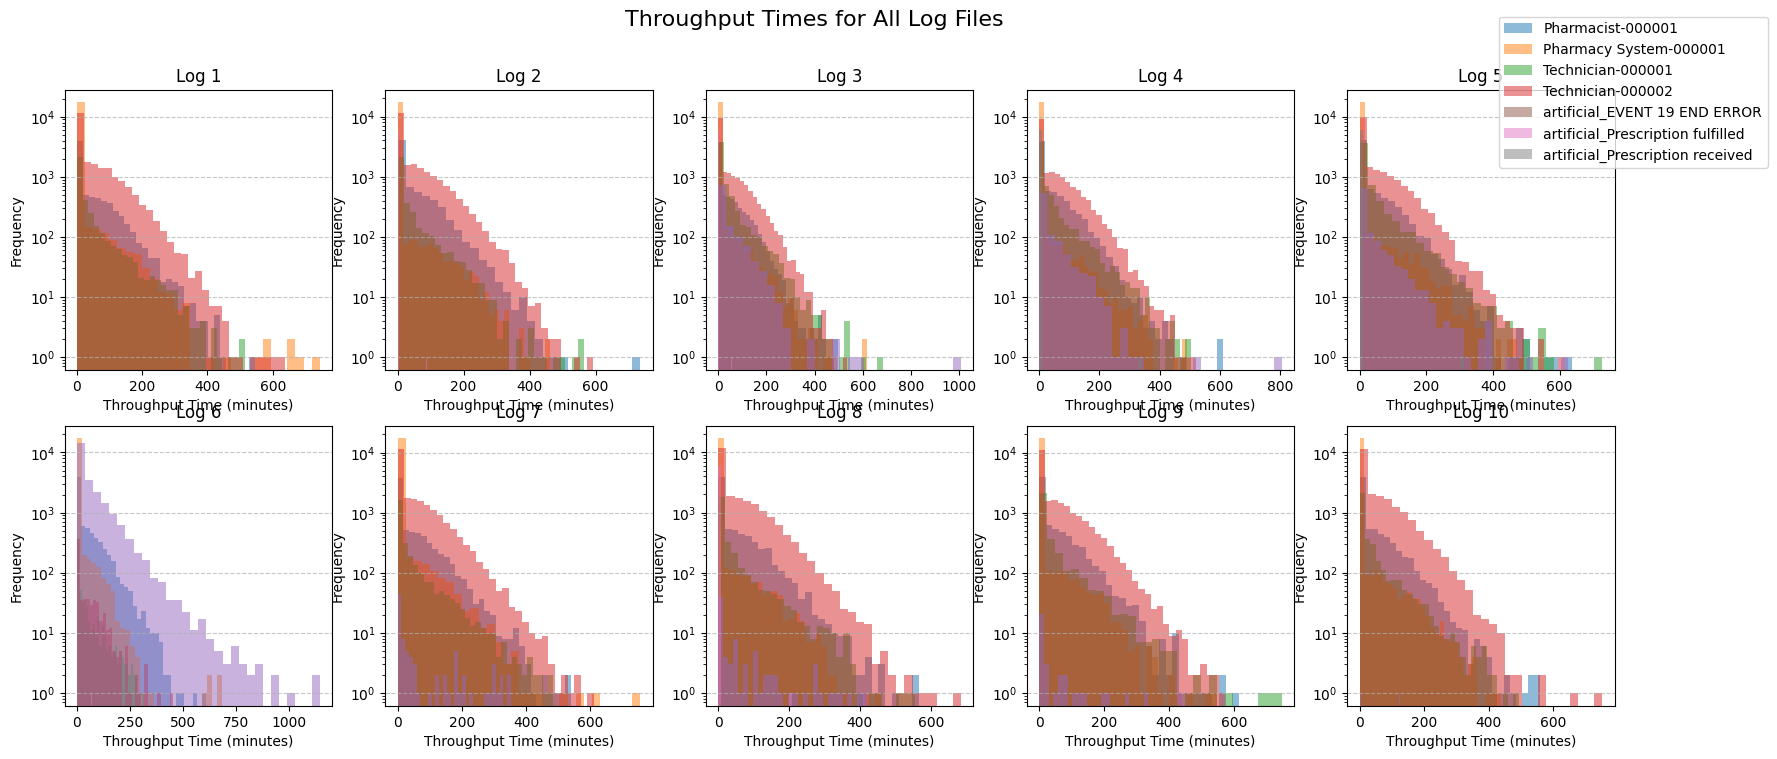

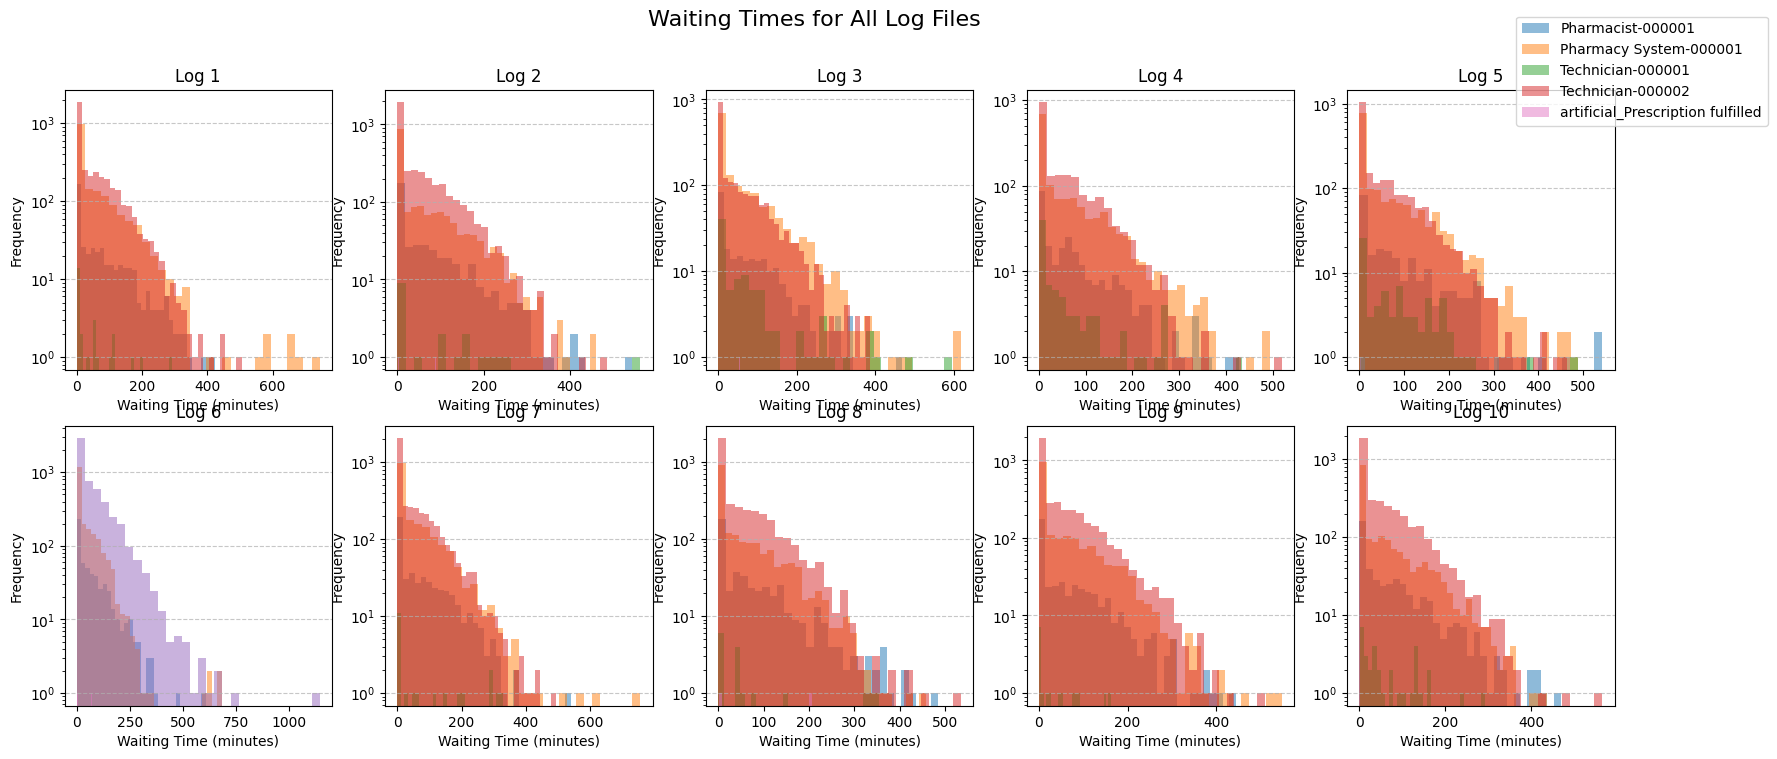

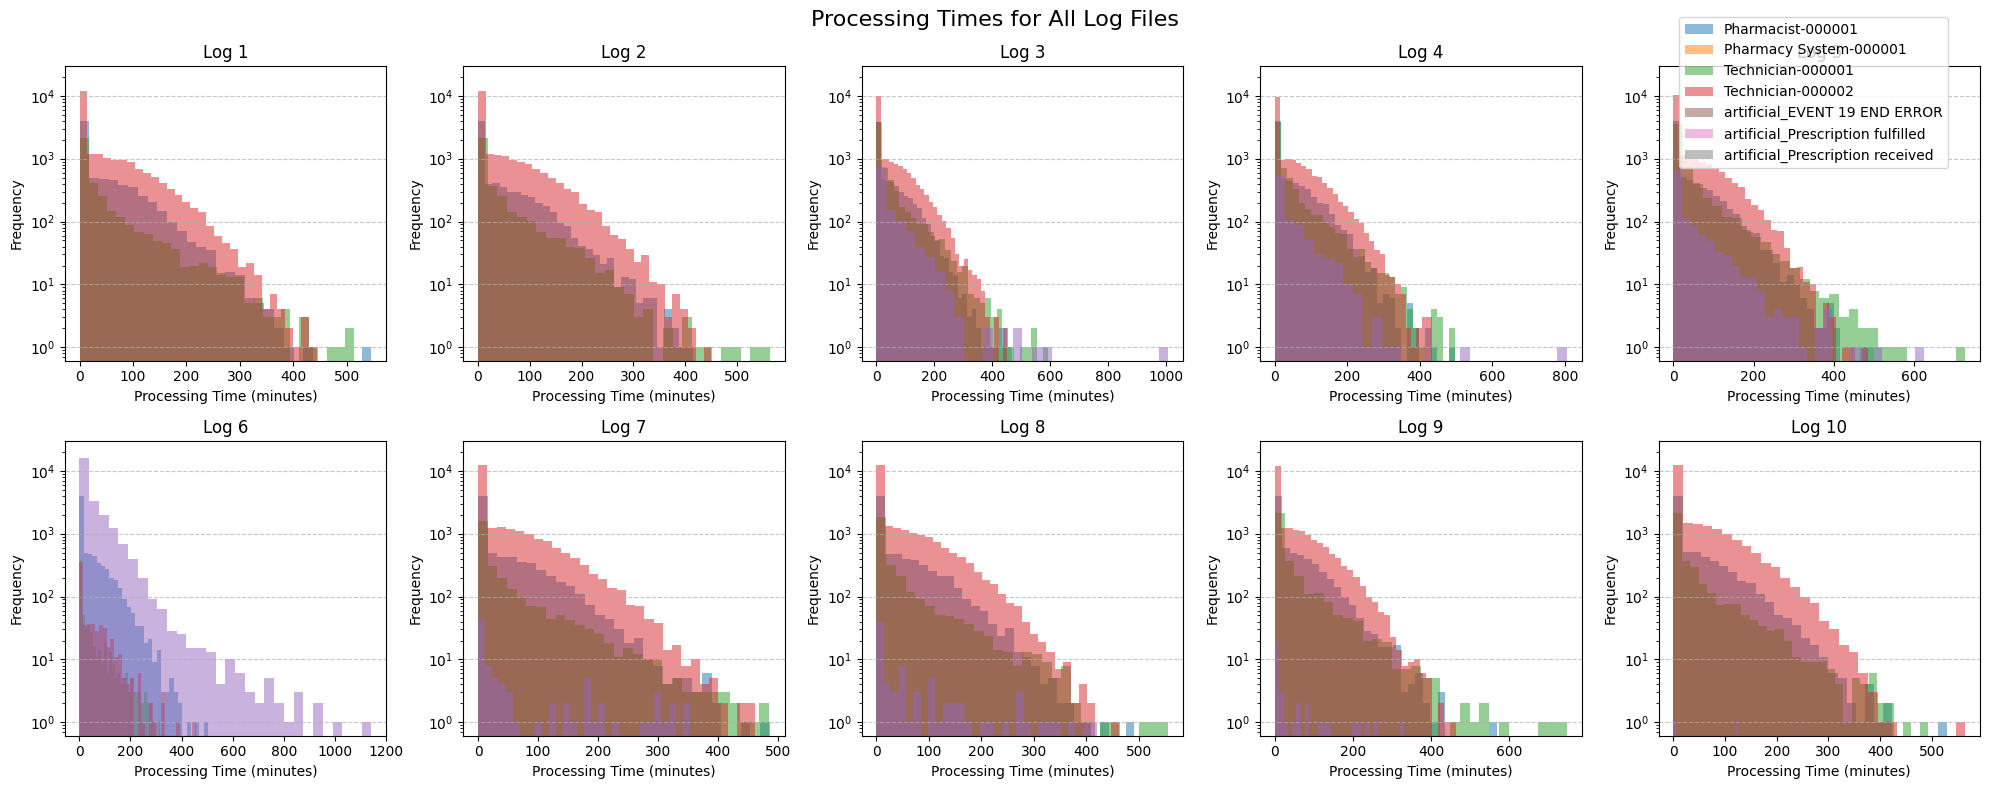

Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250602_001823.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250602_010244.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250602_025038.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250602_031031.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250602_033033.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250601_223516.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250601_225551.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250601_231630.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')


Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250601_233704.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/training/log_20250601_235722.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

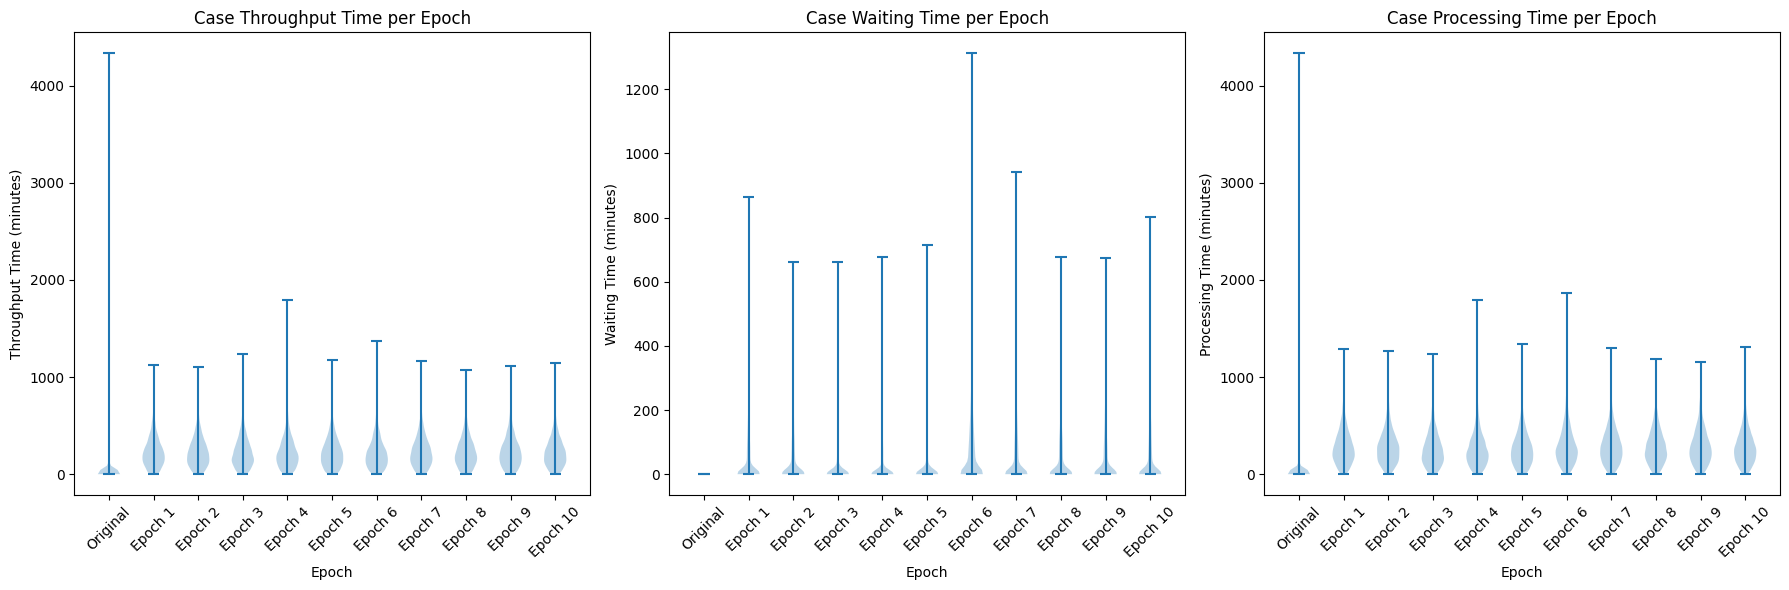

In [19]:
# Select and plot log files for the specified date
date = '20250529'
logs_directory = '../../data/logs/mean_median_std_metric_big_network/training/'
log_files = select_log_files(logs_directory, date)
plot_hist_log_files(log_files)
box_plot_log_files(log_files)

## Metrics on evaluation with mean, median & std metric and deeper and wider networks

/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/2321018517.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby('task_agent_id').apply(calculate_throughput_for_each_task_in_group)
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/4111664505.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  throughput_lists_series = df_copy.groupby(

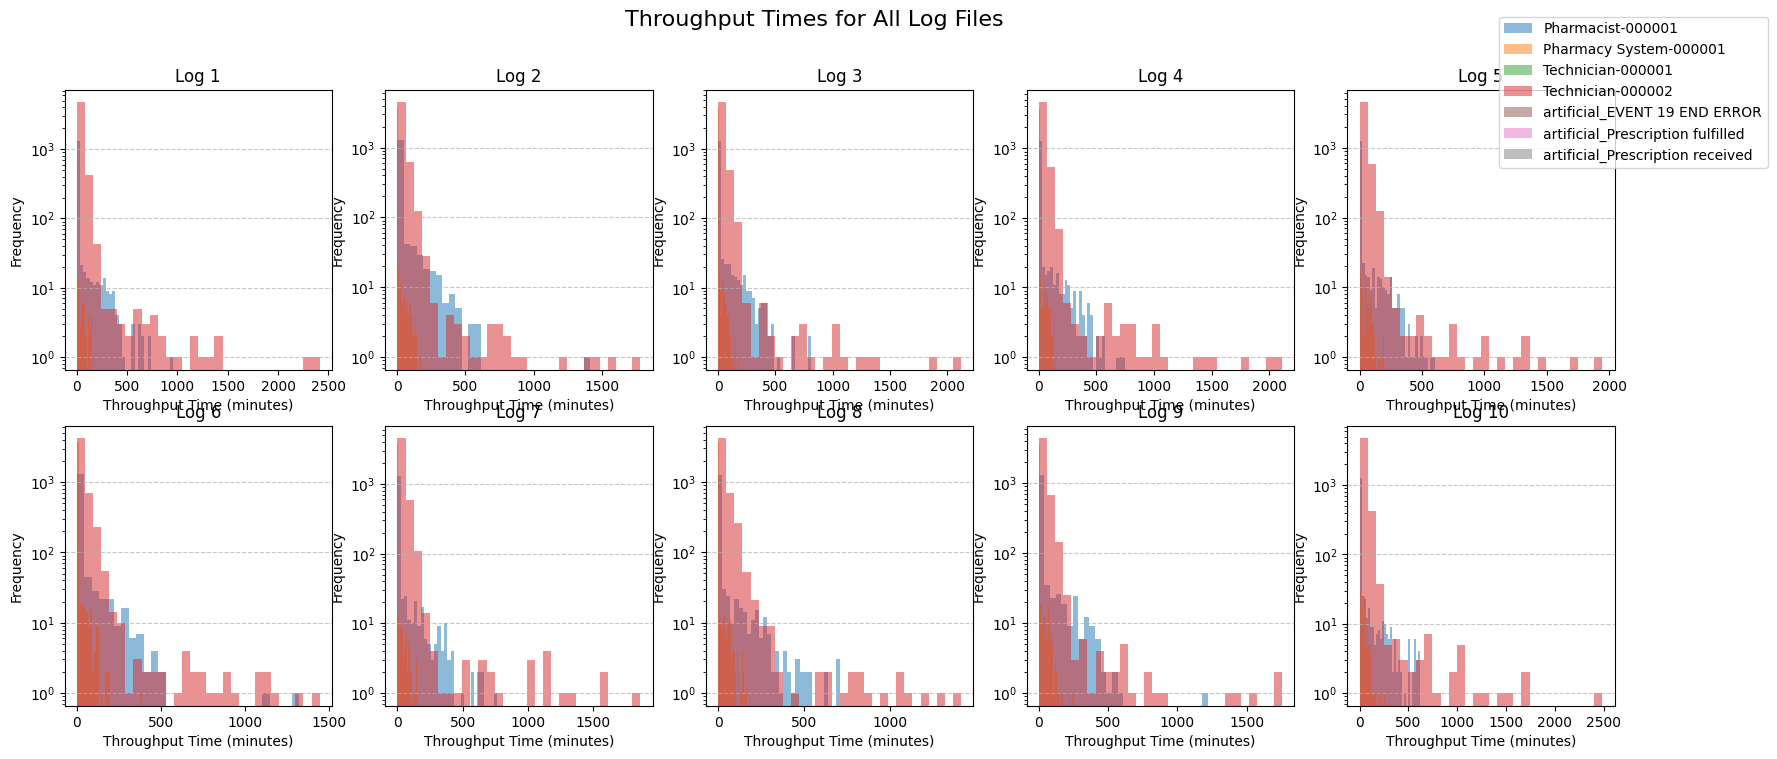

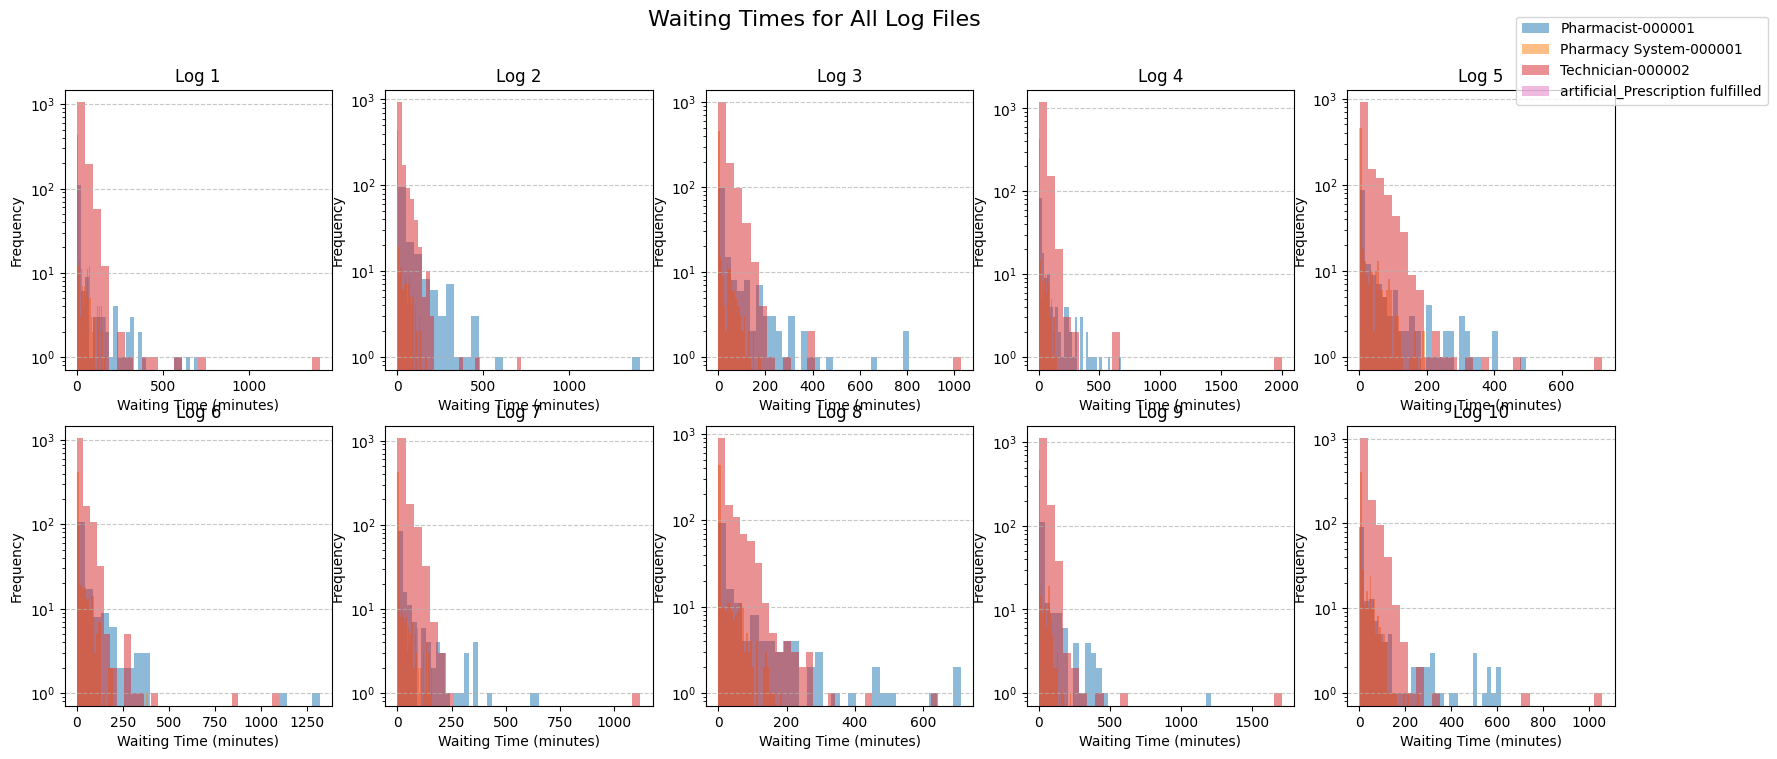

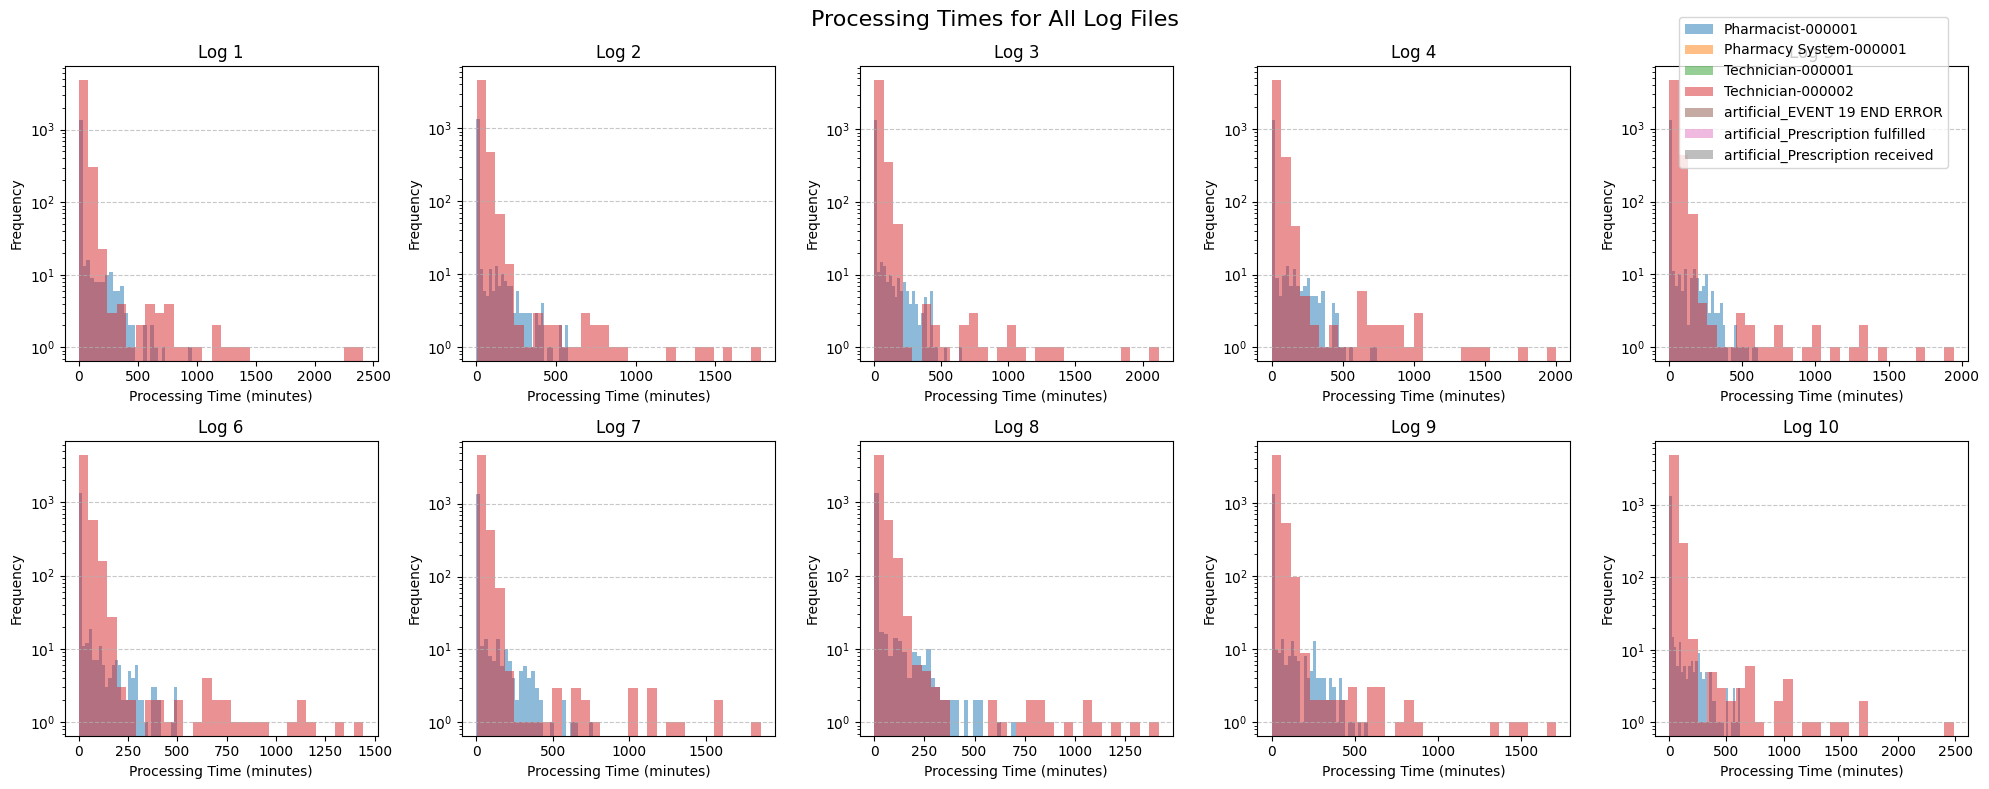

Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081348.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081404.csv
Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081420.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081439.csv
Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081454.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081509.csv
Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081525.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081540.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081556.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

Processing log file: ../../data/logs/mean_median_std_metric_big_network/evaluation/log_20250602_081612.csv


/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
/var/folders/1k/wbv_v1650sn8qfk810m9pxlh0000gn/T/ipykernel_67681/1165992532.py:191: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  group_times[col] = pd.to_datetime(group_times[col], 

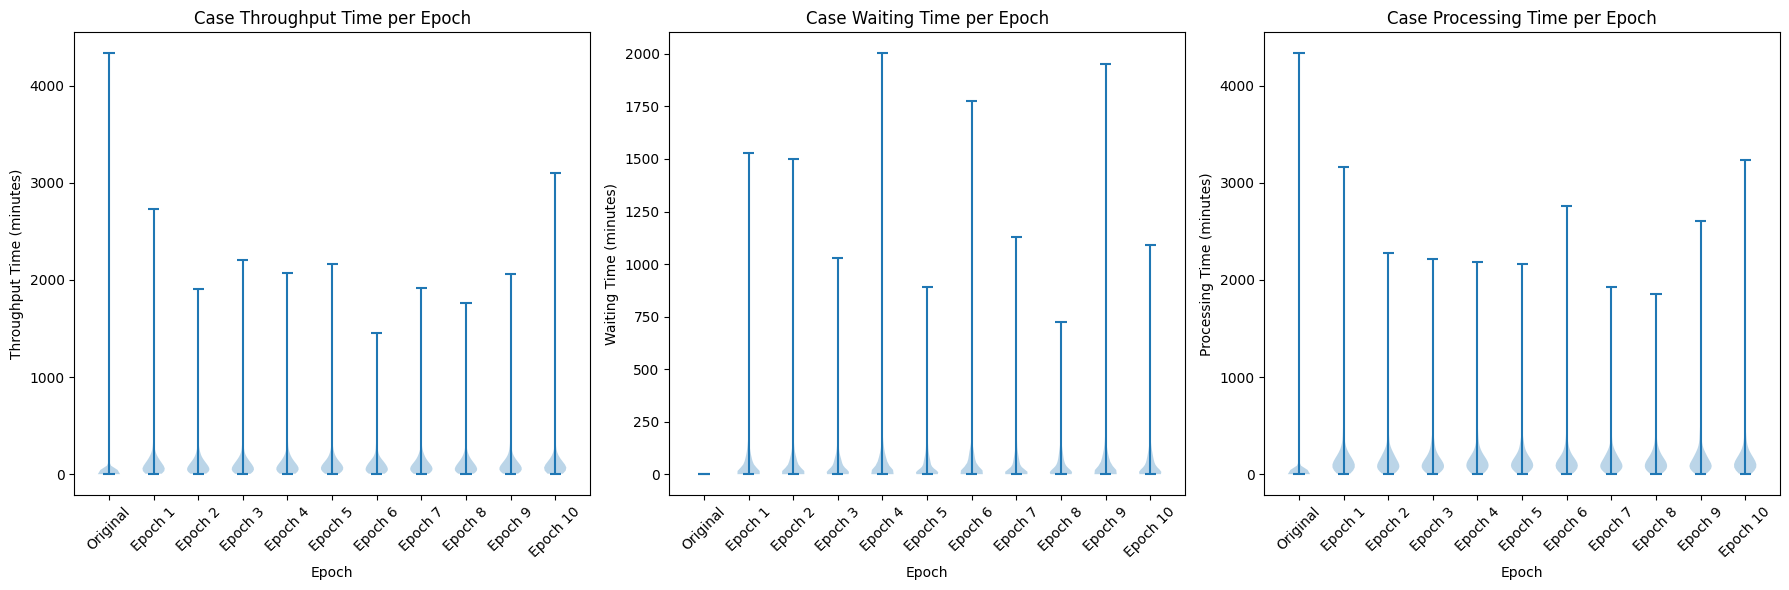

In [20]:
# Select and plot log files for the specified date
date = '20250529'
logs_directory = '../../data/logs/mean_median_std_metric_big_network/evaluation/'
log_files = select_log_files(logs_directory, date)
plot_hist_log_files(log_files)
box_plot_log_files(log_files)

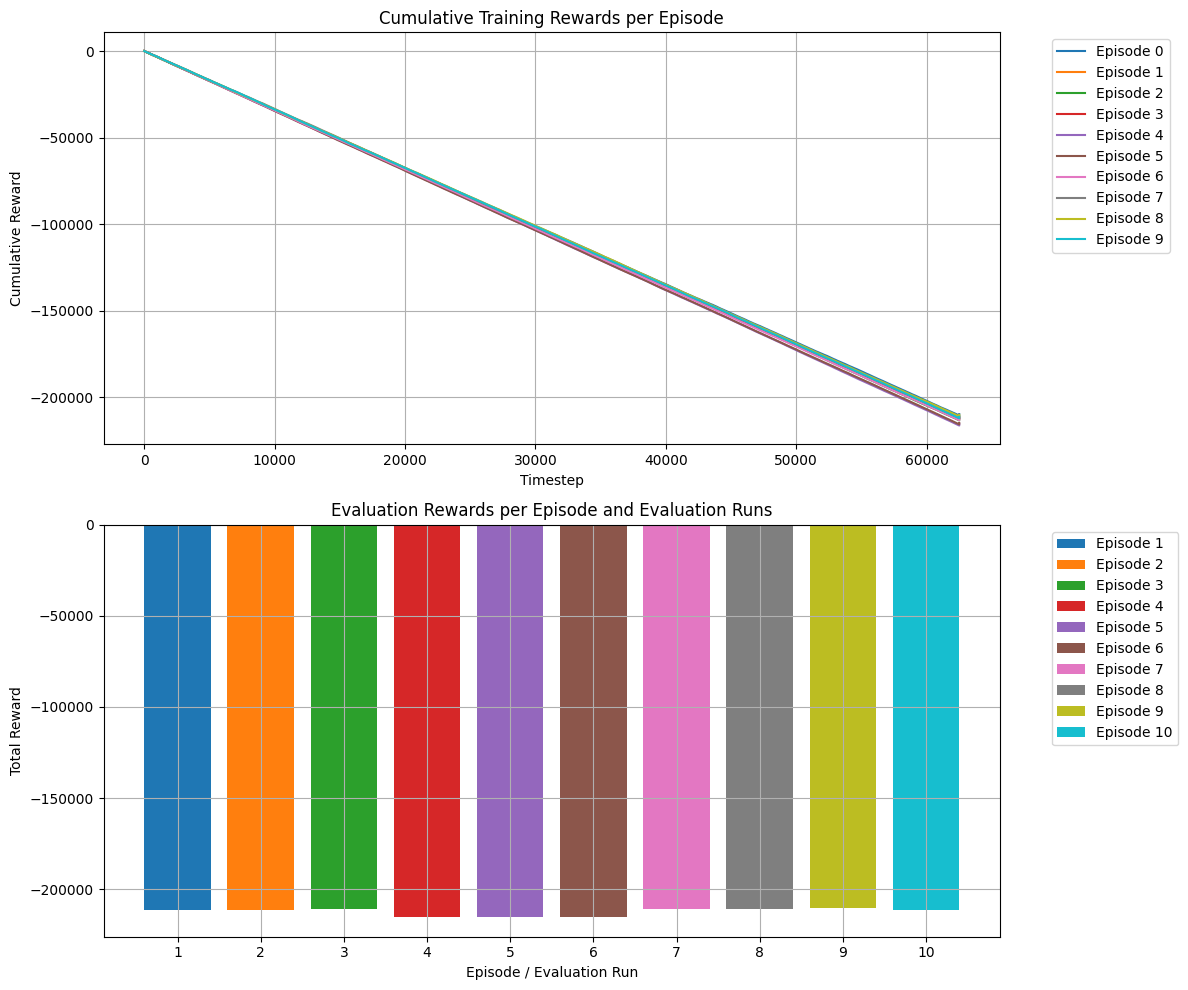

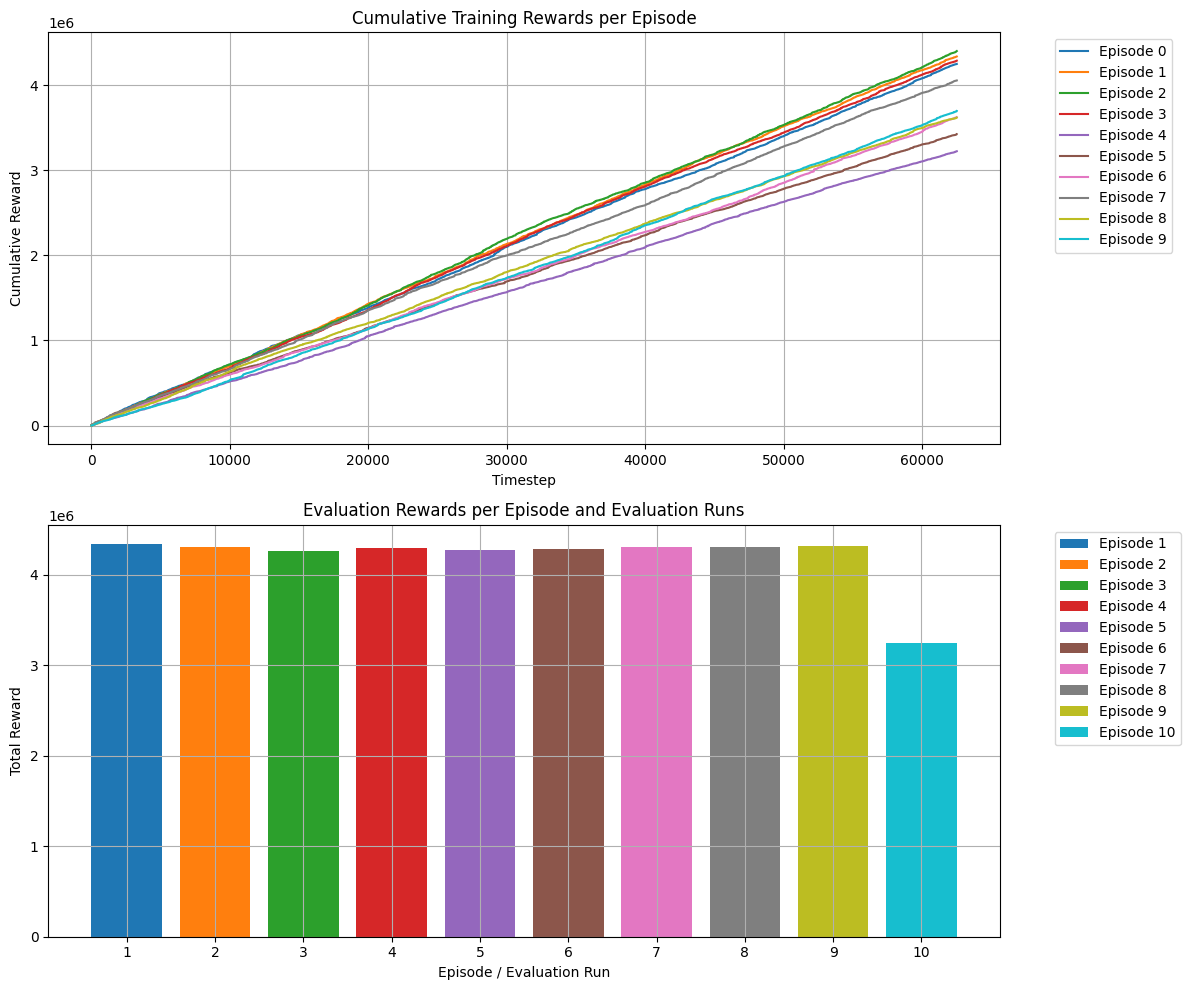

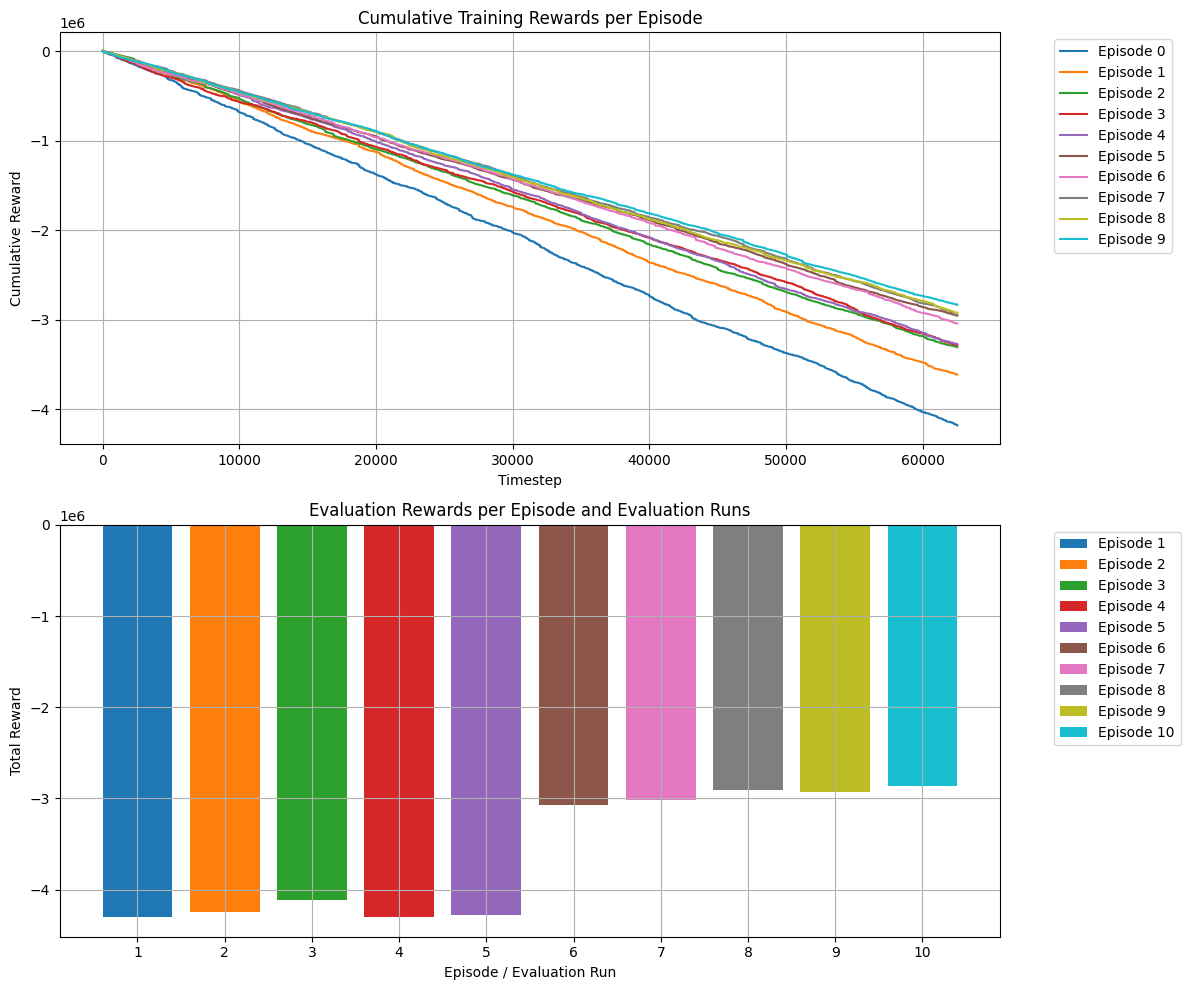

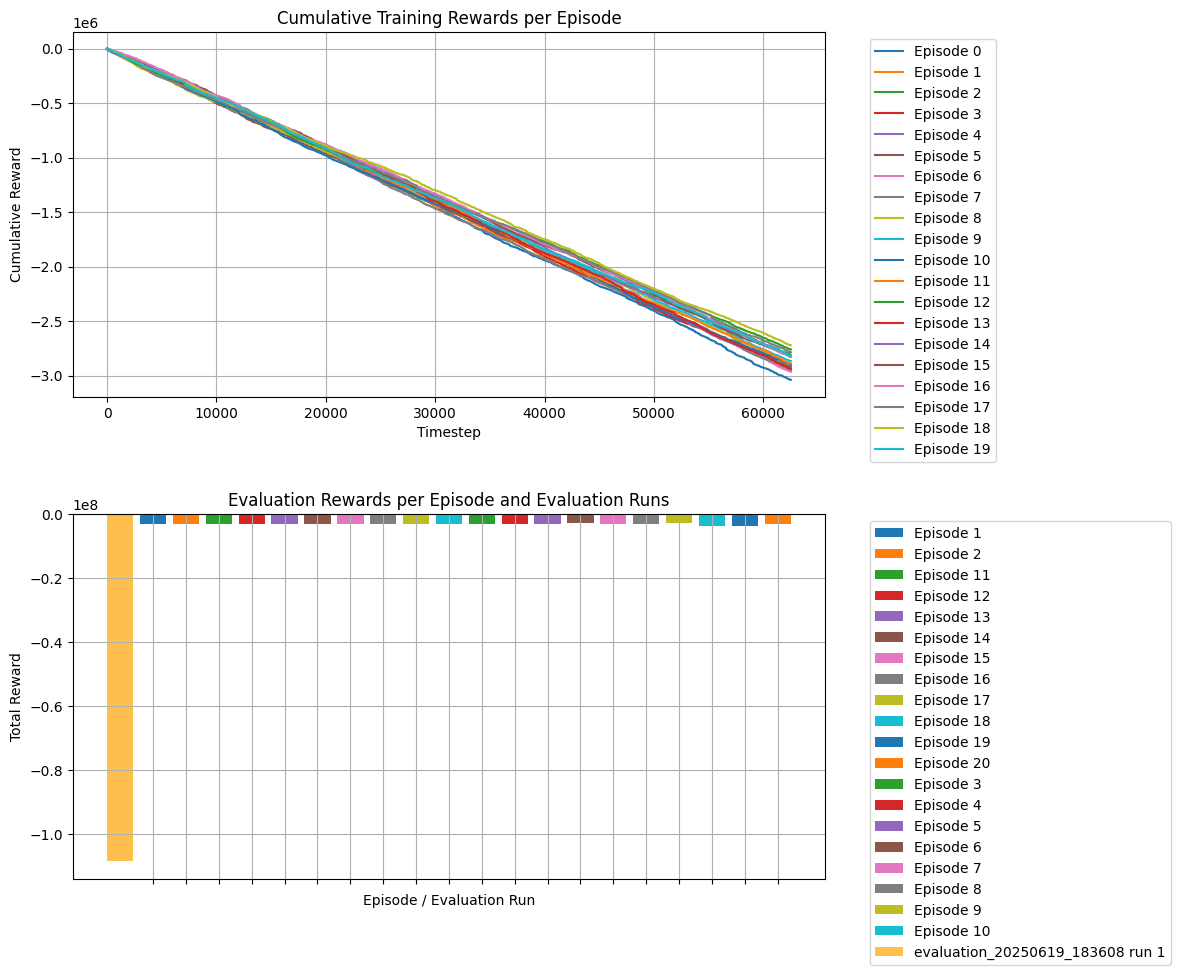

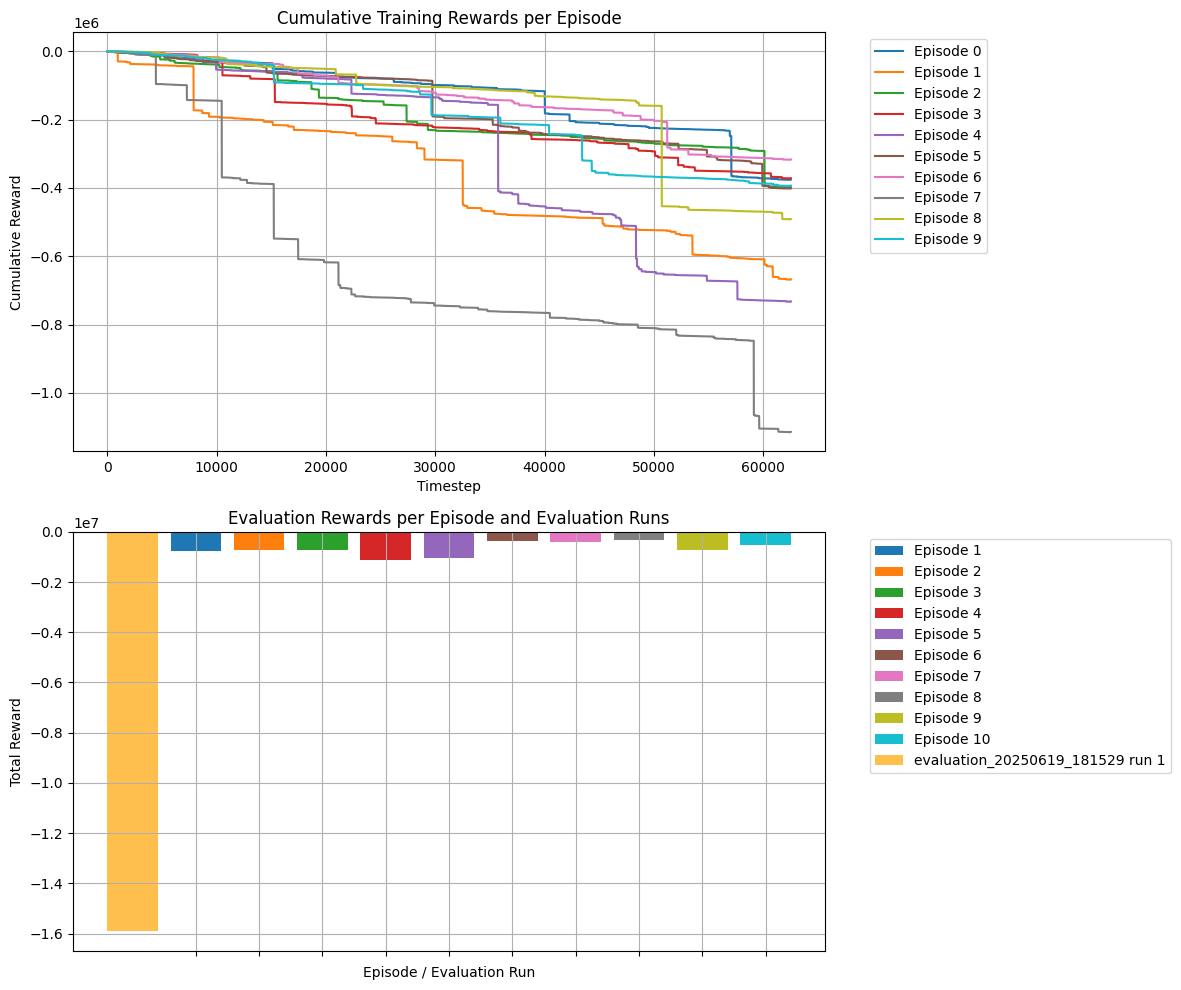

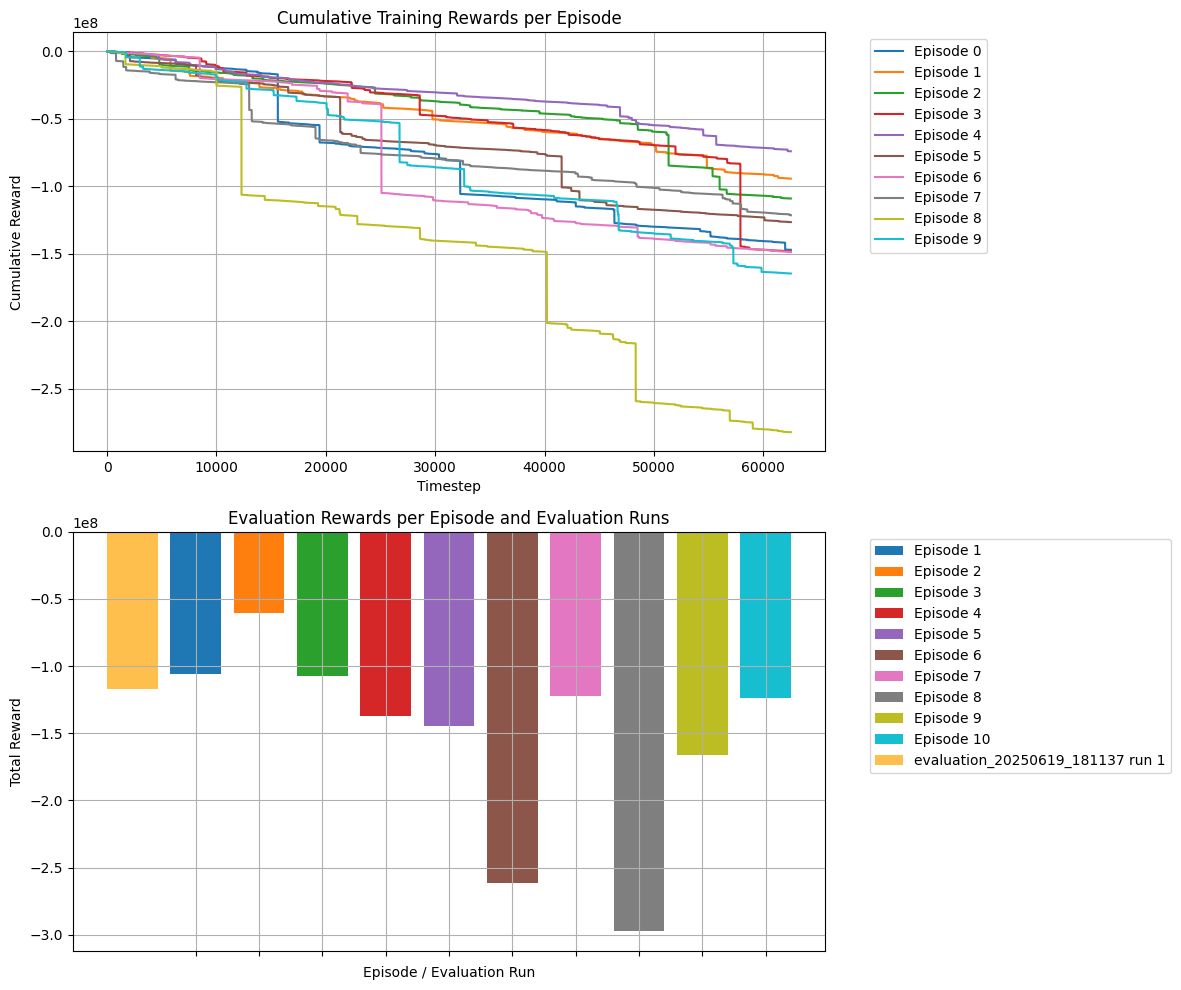

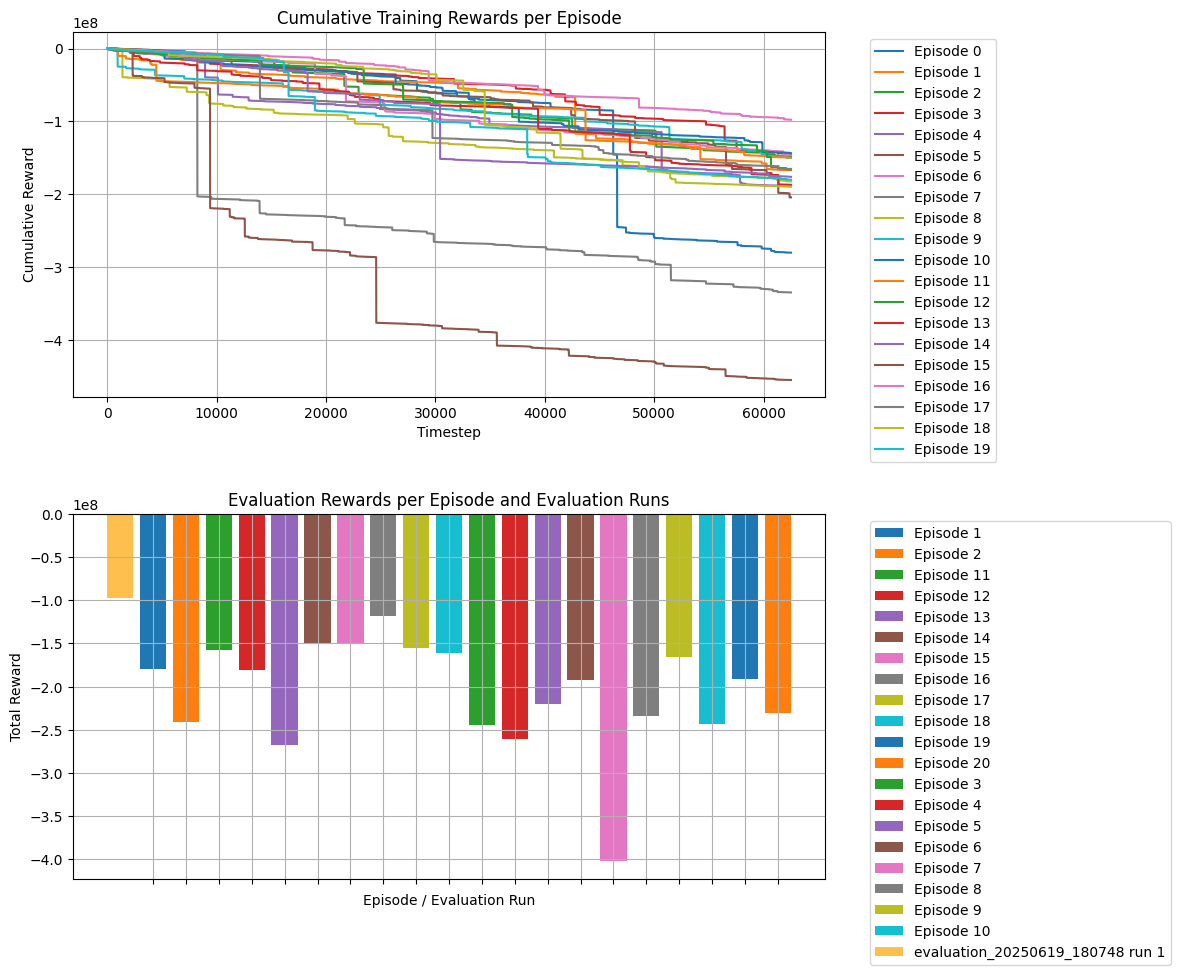

In [25]:
from pathlib import Path

def plot_rewards(experiment_dir):
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Get all episode directories
    episodes_dir = Path(experiment_dir) / "episodes"
    episode_dirs = sorted([d for d in episodes_dir.iterdir() if d.is_dir()])
    episode_dirs = [d for d in episode_dirs if d.name.startswith("episode_")]
    episode_dirs = sorted(episode_dirs, key=lambda x: int(x.name.split("_")[1]))
    
    # Plot training rewards
    for episode_dir in episode_dirs:
        # Read rewards for this episode
        rewards_file = episode_dir / "rewards.csv"
        if rewards_file.exists():
            rewards = np.loadtxt(rewards_file, delimiter=";")
            # Calculate cumulative rewards
            cumulative_rewards = np.cumsum(rewards)
            # Plot with episode number in legend
            episode_num = int(episode_dir.name.split("_")[1])
            ax1.plot(cumulative_rewards, label=f'Episode {episode_num}')
    
    # Customize training rewards plot
    ax1.set_title('Cumulative Training Rewards per Episode')
    ax1.set_xlabel('Timestep')
    ax1.set_ylabel('Cumulative Reward')
    ax1.grid(True)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Plot evaluation rewards from training episodes
    for episode_dir in sorted(episode_dirs):
        eval_dir = episode_dir / "evaluation"
        if eval_dir.exists():
            eval_rewards_file = eval_dir / "eval_reward.csv"
            if eval_rewards_file.exists():
                eval_reward = np.loadtxt(eval_rewards_file, delimiter=";")
                episode_num = int(episode_dir.name.split("_")[1]) + 1
                ax2.bar(episode_num, eval_reward, label=f'Episode {episode_num}')
    
    # Now also plot evaluation runs from evaluation_<timestamp> folders
    experiment_path = Path(experiment_dir)
    eval_folders = [d for d in experiment_path.iterdir() if d.is_dir() and d.name.startswith("evaluation_")]
    for eval_folder in sorted(eval_folders):
        rewards_file = eval_folder / "rewards.csv"
        if rewards_file.exists():
            # Each line: timestamp, avg_reward
            try:
                eval_rewards = np.loadtxt(rewards_file, delimiter=",", usecols=1)
            except Exception:
                continue
            if eval_rewards.ndim == 0:
                eval_rewards = [eval_rewards]
            # Plot as horizontal lines or bars (one per evaluation run)
            for i, avg_reward in enumerate(eval_rewards):
                ax2.bar(f'{eval_folder.name}\n#{i+1}', avg_reward, color='orange', alpha=0.7, label=f'{eval_folder.name} run {i+1}' if i == 0 else None)
    
    # Customize evaluation rewards plot
    ax2.set_title('Evaluation Rewards per Episode and Evaluation Runs')
    ax2.set_xlabel('Episode / Evaluation Run')
    ax2.set_xticks(range(1, len(episode_dirs) + 1))
    ax2.set_ylabel('Total Reward')
    ax2.grid(True)
    handles, labels = ax2.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax2.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(Path(experiment_dir) / 'reward_plots.png', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

experiment_dir = "../../experiments/mappo_20250611_202135"
plot_rewards(experiment_dir)

experiment_dir = "../../experiments/mappo_20250614_014227"
plot_rewards(experiment_dir)

experiment_dir = "../../experiments/mappo_20250614_163826"
plot_rewards(experiment_dir)

experiment_dir = "../../experiments/mappo_20250615_012925"
plot_rewards(experiment_dir)

experiment_dir = "../../experiments/mappo_20250618_105856"
plot_rewards(experiment_dir)

experiment_dir = "../../experiments/mappo_20250618_203159"
plot_rewards(experiment_dir)

experiment_dir = "../../experiments/mappo_20250619_010615"
plot_rewards(experiment_dir)

In [23]:
import seaborn as sns


def plot_reward_distributions(experiment_dir: str) -> None:
    """Plot violin and box plots of rewards for each episode.
    
    Args:
        experiment_dir: Path to the experiment directory
    """
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Get all episode directories
    episodes_dir = Path(experiment_dir) / "episodes"
    episode_dirs = sorted([d for d in episodes_dir.iterdir() if d.is_dir() and d.name.startswith("episode_")])
    
    # Collect rewards for each episode
    episode_rewards = []
    episode_numbers = []
    
    for episode_dir in episode_dirs:
        # Read rewards for this episode
        rewards_file = episode_dir / "rewards.csv"
        if rewards_file.exists():
            rewards = np.loadtxt(rewards_file, delimiter=";")
            episode_rewards.append(rewards)
            episode_num = int(episode_dir.name.split("_")[1])
            episode_numbers.append(episode_num)
    
    # Create a DataFrame for easier plotting
    df = pd.DataFrame({
        'Episode': np.repeat(episode_numbers, [len(r) for r in episode_rewards]),
        'Reward': np.concatenate(episode_rewards)
    })
    
    # Plot violin plot
    sns.violinplot(data=df, x='Episode', y='Reward', ax=ax1)
    ax1.set_title('Reward Distribution per Episode (Violin Plot)')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Reward')
    ax1.grid(True)
    
    # Plot box plot (without outliers)
    sns.boxplot(data=df, x='Episode', y='Reward', ax=ax2, showfliers=False)
    ax2.set_title('Reward Distribution per Episode (Box Plot)')
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Reward')
    ax2.grid(True)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(Path(experiment_dir) / 'reward_distributions.png', bbox_inches='tight', dpi=300)
    plt.close()


def plot_log_metrics(experiment_dir: str, eval_epochs: int) -> None:
    """Plot metrics from log files in the experiment directory.
    
    Args:
        experiment_dir: Path to the experiment directory
    """
    # Initialize lists to store metrics
    throughput_per_epoch = []
    waiting_per_epoch = []
    processing_per_epoch = []
    epoch_labels = []
    
    # First, process the original dataset
    print("Processing original dataset...")
    original_log_file = "../../data/input/train_preprocessed.csv"  # Adjust path if needed
    if os.path.exists(original_log_file):
        original_df = pd.read_csv(original_log_file)
        case_groups = original_df.groupby('case_id')
        
        # Initialize lists for original data
        throughput_times = []
        waiting_times = []
        processing_times = []
        
        for case_id, group in case_groups:
            # Convert timestamps once for the entire group
            group_times = group[['start_timestamp', 'end_timestamp']].copy()
            for col in group_times.columns:
                group_times[col] = pd.to_datetime(group_times[col], errors='coerce')
            
            # Calculate waiting and processing times vectorized
            waiting_times_vec = (group_times['start_timestamp'] - group_times['start_timestamp']).dt.total_seconds() / 60
            processing_times_vec = (group_times['end_timestamp'] - group_times['start_timestamp']).dt.total_seconds() / 60
            throughput_times_vec = (group_times['end_timestamp'] - group_times['start_timestamp']).dt.total_seconds() / 60
            
            # Sum up the times for the case
            waiting = waiting_times_vec.sum()
            processing = processing_times_vec.sum()
            throughput = throughput_times_vec.sum()
            
            waiting_times.append(waiting)
            processing_times.append(processing)
            throughput_times.append(throughput)
        
        # Append original data as first epoch
        throughput_per_epoch.append(throughput_times)
        waiting_per_epoch.append(waiting_times)
        processing_per_epoch.append(processing_times)
        epoch_labels.append('Original')
    
    # Get all log files from the logs directory
    logs_dir = Path(experiment_dir) / "logs"
    log_files = sorted([f for f in logs_dir.glob("log_*.csv")])
    
    # Take first log file and then skip 4 for the rest
    selected_logs = [log_files[0]] + log_files[eval_epochs + 1::eval_epochs + 1]
    
    for i, log_file in enumerate(selected_logs):
        print(f"Processing log file: {log_file}")
        log_df = pd.read_csv(log_file)
        
        # Group by case_id
        case_groups = log_df.groupby('case_id')
        
        # Initialize lists for this epoch
        throughput_times = []
        waiting_times = []
        processing_times = []
        
        for case_id, group in case_groups:
            # Convert timestamps
            group_times = group[['task_assigned_time', 'task_started_time', 'task_completed_time']].copy()
            for col in group_times.columns:
                # Parse timestamps with the specific format including microseconds and timezone
                group_times[col] = pd.to_datetime(group_times[col], format='mixed')
            
            # Calculate metrics (timestamps are now in UTC)
            waiting_times_vec = (group_times['task_started_time'] - group_times['task_assigned_time']).dt.total_seconds() / 60
            processing_times_vec = (group_times['task_completed_time'] - group_times['task_started_time']).dt.total_seconds() / 60
            throughput_times_vec = (group_times['task_completed_time'] - group_times['task_assigned_time']).dt.total_seconds() / 60
            
            # Sum up the times for the case
            waiting = waiting_times_vec.sum()
            processing = processing_times_vec.sum()
            throughput = throughput_times_vec.sum()
            
            waiting_times.append(waiting)
            processing_times.append(processing)
            throughput_times.append(throughput)
        
        # Append to lists for plots
        throughput_per_epoch.append(throughput_times)
        waiting_per_epoch.append(waiting_times)
        processing_per_epoch.append(processing_times)
        epoch_labels.append(f"Epoch {i}")
    
    # Create figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot violin plots for each metric
    axes[0].violinplot(throughput_per_epoch, positions=range(len(throughput_per_epoch)))
    axes[0].set_xticks(range(len(epoch_labels)))
    axes[0].set_xticklabels(epoch_labels, rotation=45)
    axes[0].set_title("Case Throughput Time per Epoch")
    axes[0].set_ylabel("Throughput Time (minutes)")
    axes[0].set_xlabel("Epoch")
    axes[0].grid(True)
    
    axes[1].violinplot(waiting_per_epoch, positions=range(len(waiting_per_epoch)))
    axes[1].set_xticks(range(len(epoch_labels)))
    axes[1].set_xticklabels(epoch_labels, rotation=45)
    axes[1].set_title("Case Waiting Time per Epoch")
    axes[1].set_ylabel("Waiting Time (minutes)")
    axes[1].set_xlabel("Epoch")
    axes[1].grid(True)
    
    axes[2].violinplot(processing_per_epoch, positions=range(len(processing_per_epoch)))
    axes[2].set_xticks(range(len(epoch_labels)))
    axes[2].set_xticklabels(epoch_labels, rotation=45)
    axes[2].set_title("Case Processing Time per Epoch")
    axes[2].set_ylabel("Processing Time (minutes)")
    axes[2].set_xlabel("Epoch")
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.savefig(Path(experiment_dir) / 'log_metrics.png', bbox_inches='tight', dpi=300)
    plt.close()


experiment_dir = "../../experiments/mappo_20250614_163826"
plot_reward_distributions(experiment_dir)
plot_log_metrics(experiment_dir, 3)

experiment_dir = "../../experiments/mappo_20250615_012925"
plot_reward_distributions(experiment_dir)
plot_log_metrics(experiment_dir, 3)

experiment_dir = "../../experiments/mappo_20250618_105856"
plot_reward_distributions(experiment_dir)
plot_log_metrics(experiment_dir, 1)

experiment_dir = "../../experiments/mappo_20250618_203159"
plot_reward_distributions(experiment_dir)
plot_log_metrics(experiment_dir, 1)

experiment_dir = "../../experiments/mappo_20250619_010615"
plot_reward_distributions(experiment_dir)
plot_log_metrics(experiment_dir, 3)

Processing original dataset...
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_163827.csv
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_170027.csv
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_172229.csv
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_183658.csv
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_185911.csv
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_192056.csv
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_194415.csv
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_200603.csv
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_202806.csv
Processing log file: ../../experiments/mappo_20250614_163826/logs/log_20250614_205002.csv
Processing original dataset...
Processing log file: ../../experiments

In [ ]:
log_files = select_log_files("../../experiments/mappo_20250619_010615/evaluation_20250619_180748/logs", '20250619_180748')
box_plot_log_files(log_files)